<a href="https://colab.research.google.com/github/RaharditoDio/Business-Intelligence-Assignment/blob/main/Assignment_Day_12_Rahardito_Dio_Prastowo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sktime[all_extras]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 7.8 MB/s 
     |████████████████████████████████| 3.3 MB 51.1 MB/s 
     |████████████████████████████████| 9.8 MB 41.6 MB/s 
     |████████████████████████████████| 65 kB 5.2 MB/s 
     |████████████████████████████████| 177 kB 67.5 MB/s 
     |████████████████████████████████| 6.9 MB 41.5 MB/s 
     |████████████████████████████████| 125 kB 70.0 MB/s 
     |████████████████████████████████| 11.2 MB 30.7 MB/s 
     |████████████████████████████████| 1.4 MB 17.7 MB/s 
     |████████████████████████████████| 788 kB 49.7 MB/s 
     |████████████████████████████████| 97 kB 6.2 MB/s 
     |████████████████████████████████| 793 kB 50.7 MB/s 
     |████████████████████████████████| 228 kB 50.7 MB/s 
     |████████████████████████████████| 623 kB 51.2 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |███████████████████████████████

In [ ]:
# utilities packages
import datetime
import os

# data wrangling and transformation package
import numpy as np
import pandas as pd
import statsmodels.api as sm

# data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# time series modeling
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
# load sktime for time series forecasting

from sktime.utils.plotting import plot_series # from plotting
from sktime.forecasting.naive import NaiveForecaster # for naive forecasting
from sktime.forecasting.arima import AutoARIMA # for automated ARIMA forecasting
from sktime.forecasting.exp_smoothing import ExponentialSmoothing # for exponential smoothing forecasting
from sktime.forecasting.ets import AutoETS # for automated ETS forecasting 
from sktime.forecasting.tbats import TBATS # for TBATS forecasting
from sktime.forecasting.fbprophet import Prophet # for Prophet forecasting
from sktime.forecasting.base import ForecastingHorizon # for creating forecast horizon
from sktime.forecasting.model_selection import (
    temporal_train_test_split, 
    ExpandingWindowSplitter, 
    SlidingWindowSplitter
) # for train-test split and cross validation
from sktime.performance_metrics.forecasting import (
    mean_absolute_error, 
    mean_squared_error, 
    mean_absolute_percentage_error
) # for evaluation metrics
from sktime.forecasting.model_evaluation import evaluate # for evaluating CV results

%matplotlib inline
import warnings
sns.set_style("ticks")
sns.set(font_scale = 1.5)

# Basic 

## Load Dataset

In [ ]:
# read data
dataset_1 = pd.read_csv("/content/task_1_1.csv")
dataset_2 = pd.read_csv("/content/task_1_2.csv")
dataset_3 = pd.read_csv("/content/task_1_3.csv")
dataset_4 = pd.read_csv("/content/task_1_4.csv")
dataset_5 = pd.read_csv("/content/task_1_5.csv")
dataset_6 = pd.read_csv("/content/task_1_6.csv")
dataset_7 = pd.read_csv("/content/task_1_7.csv")
dataset_8 = pd.read_csv("/content/task_1_8.csv")
dataset_9 = pd.read_csv("/content/task_1_9.csv")
dataset_10 = pd.read_csv("/content/task_1_10.csv")

## Data 1

In [ ]:
# set dataset index
dataset_1 = dataset_1.set_index('index')
dataset_1

,value
index,
101,1.323913
102,1.197747
103,-0.951691
104,1.904784
105,-0.551699
...,...
196,1.110444
197,0.521014
198,0.670843


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

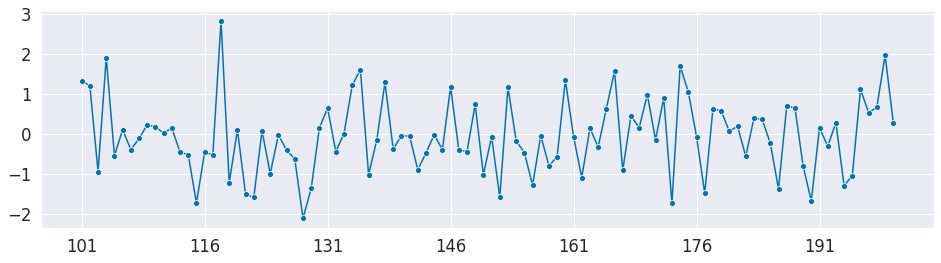

In [ ]:
# create series plot
plot_series(dataset_1)

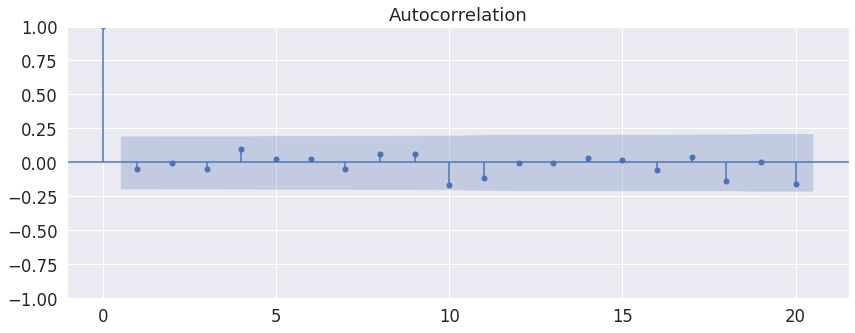

In [ ]:
# create ACF plot
plot_acf(dataset_1).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


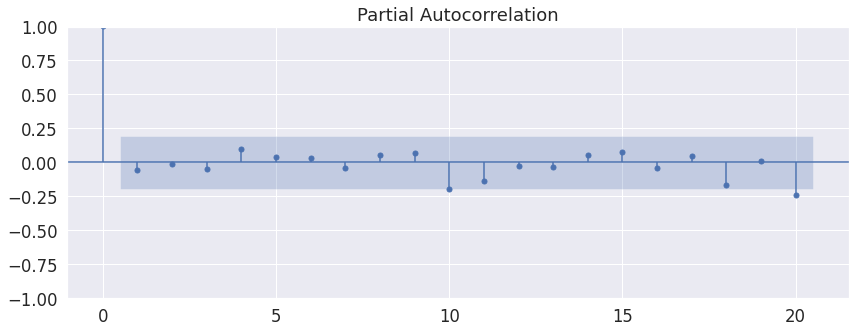

In [ ]:
# create PACF plot
plot_pacf(dataset_1).set_size_inches((14,5));

In [ ]:
# create adf_test function
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [ ]:
# shot adf rasult
adf_test(dataset_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.048554e+01
p-value                        1.183064e-18
#Lags Used                     0.000000e+00
Number of Observations Used    9.900000e+01
Critical Value (1%)           -3.498198e+00
Critical Value (5%)           -2.891208e+00
Critical Value (10%)          -2.582596e+00
dtype: float64


**Interpretation :** 
1. P-value less than 0.05, there is evidence for rejecting null hypothesis in favor of the alternative. Hence, the series is stationary
2. There is no significant lag in ACF and PACF, it can be said that the model from this data is ARIMA (0,0,0) / white noise

## Data 2

In [ ]:
# set dataset index
dataset_2 = dataset_2.set_index('index')
dataset_2

,value
index,
101,2.362450
102,3.849367
103,2.421574
104,5.052382
105,4.103413
...,...
196,-15.973898
197,-15.399235
198,-14.564530


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

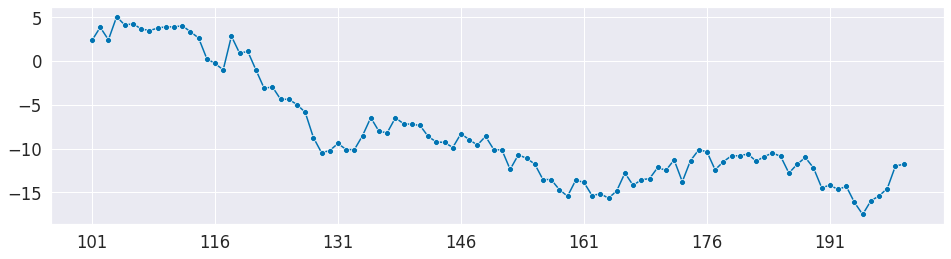

In [ ]:
# create series plot
plot_series(dataset_2)

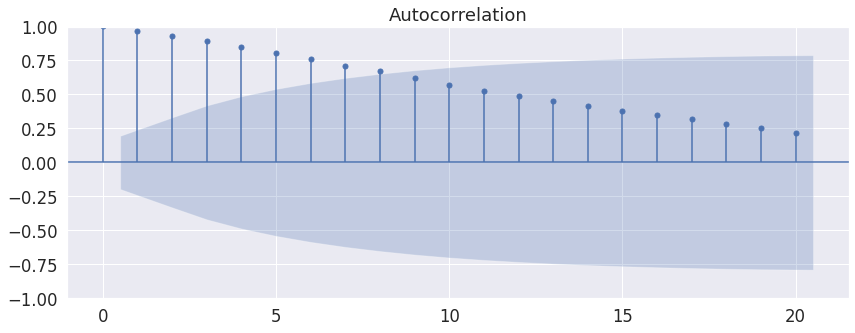

In [ ]:
# create ACF plot
plot_acf(dataset_2).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


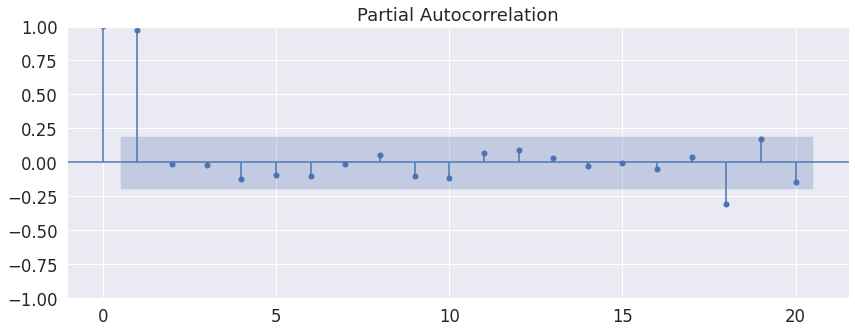

In [ ]:
# create PACF plot
plot_pacf(dataset_2).set_size_inches((14,5));

In [ ]:
# show adf result
adf_test(dataset_2)

Results of Dickey-Fuller Test:
Test Statistic                 -1.639494
p-value                         0.462525
#Lags Used                      0.000000
Number of Observations Used    99.000000
Critical Value (1%)            -3.498198
Critical Value (5%)            -2.891208
Critical Value (10%)           -2.582596
dtype: float64


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

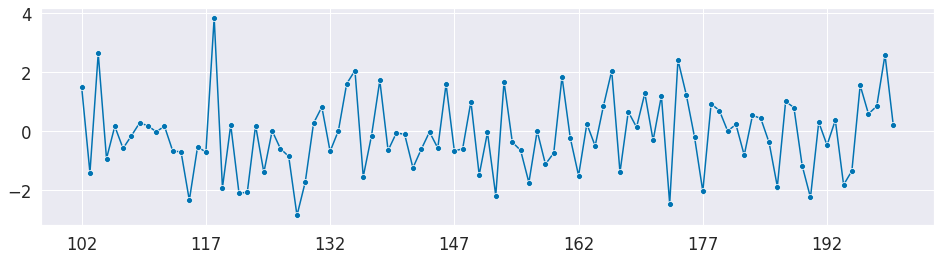

In [ ]:
# differencing
dataset_2_diff1 = dataset_2.diff().dropna()
plot_series(dataset_2_diff1)

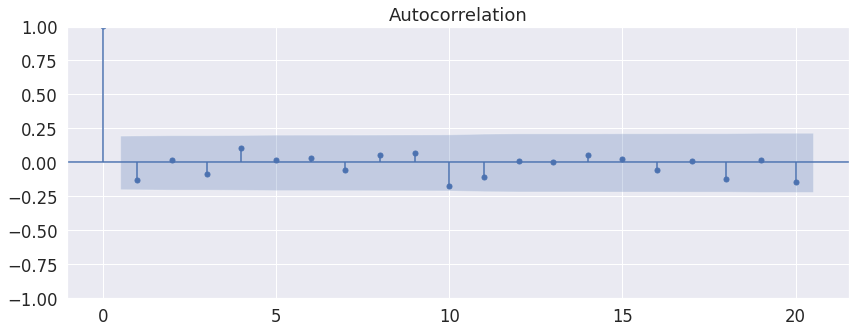

In [ ]:
# create ACF plot
plot_acf(dataset_2_diff1).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


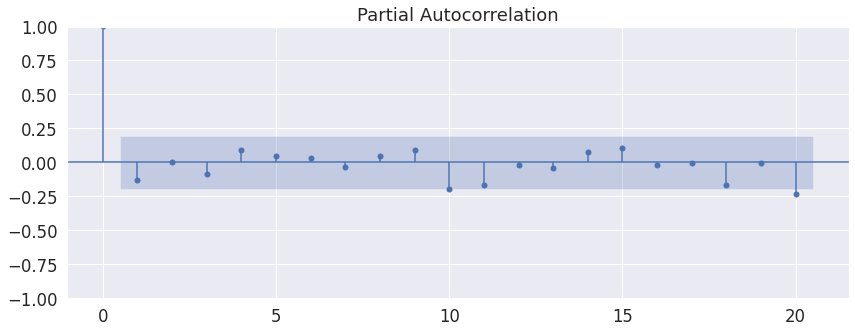

In [ ]:
# create PACF plot
plot_pacf(dataset_2_diff1).set_size_inches((14,5));

In [ ]:
# show adf result
adf_test(dataset_2_diff1)

Results of Dickey-Fuller Test:
Test Statistic                -1.126740e+01
p-value                        1.567163e-20
#Lags Used                     0.000000e+00
Number of Observations Used    9.800000e+01
Critical Value (1%)           -3.498910e+00
Critical Value (5%)           -2.891516e+00
Critical Value (10%)          -2.582760e+00
dtype: float64


**Interpretation :**

Before Differencing 
1. There is exponential decay in the ACF plot
2. There is significant lag at 1 for PACF,
3. P-value more than 0.05, there is no evidence for rejecting null hypothesis in favor of the alternative. Hence, the series is non-stationary so we have to conduct differencing process 

After Differencing 
1. There is no significant lag in ACF and PACF, it can be said that the model from this data is ARIMA (0,1,0) / random walk

## Data 3

In [ ]:
# set dataset index
dataset_3 = dataset_3.set_index('index')
dataset_3

,value
index,
101,-1.405059
102,0.471055
103,-0.006376
104,1.030057
105,0.207344
...,...
196,2.114398
197,0.942640
198,0.645871


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

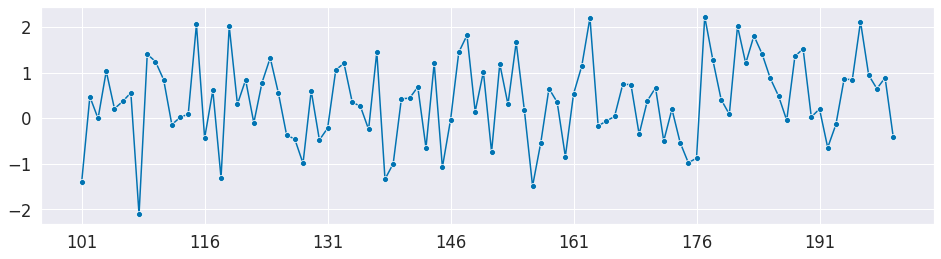

In [ ]:
# create series plot
plot_series(dataset_3)

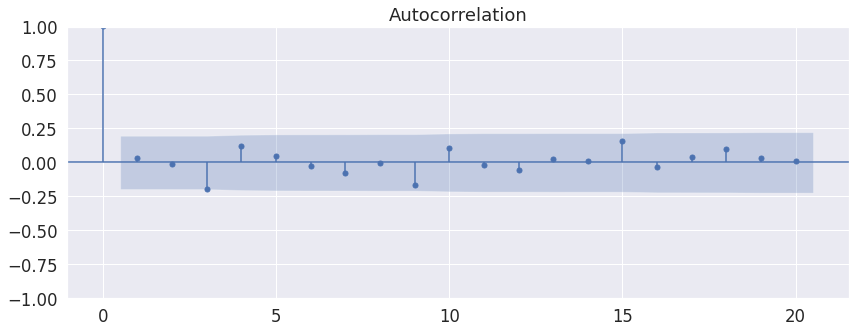

In [ ]:
# create ACF plot
plot_acf(dataset_3).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


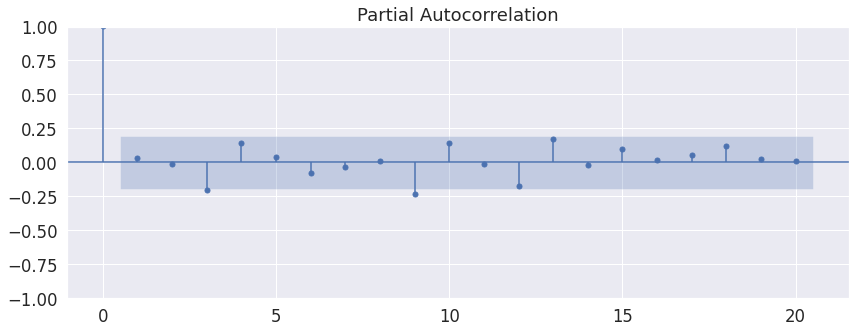

In [ ]:
# create PACF plot
plot_pacf(dataset_3).set_size_inches((14,5));

In [ ]:
# show adf result
adf_test(dataset_3)

Results of Dickey-Fuller Test:
Test Statistic                 -4.791928
p-value                         0.000056
#Lags Used                      3.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64


**Interpretation :** 
1. P-value less than 0.05, there is evidence for rejecting null hypothesis in favor of the alternative. Hence, the series is stationary
2. There is no significant lag in ACF and PACF, it can be said that the model from this data is ARIMA (0,0,0) / white noise

## Data 4

In [ ]:
# set dataset index
dataset_4 = dataset_4.set_index('index')
dataset_4

,value
index,
1 Jan,14.346754
1 Feb,14.877385
1 Mar,16.630073
1 Apr,18.742186
1 Mei,17.657716
...,...
8 Des,-13.082019
9 Jan,-6.983444
9 Feb,-4.228796


In [ ]:
# reset index
dataset_4 = dataset_4.reset_index(drop = True)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

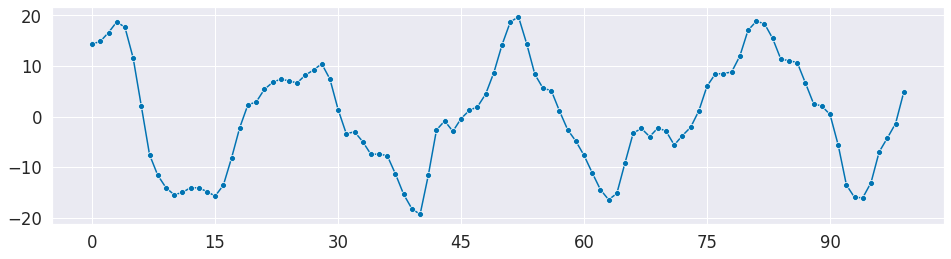

In [ ]:
# create series plot
plot_series(dataset_4)

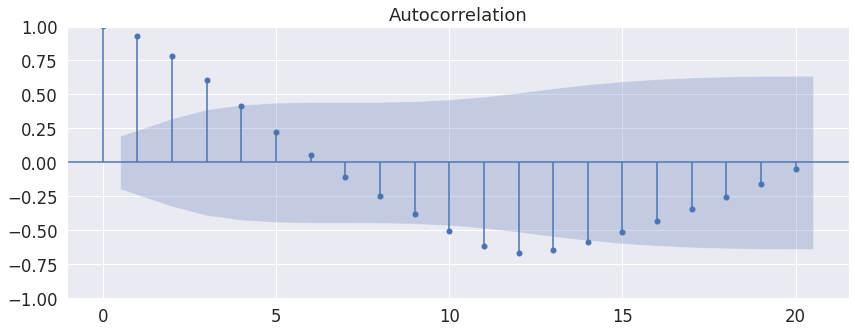

In [ ]:
# create ACF plot
plot_acf(dataset_4).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


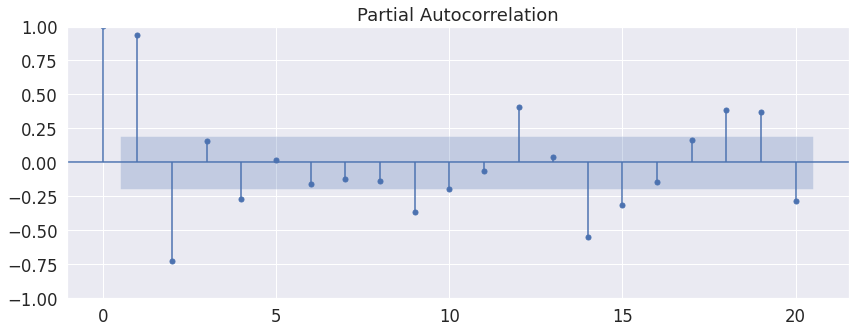

In [ ]:
# create PACF plot
plot_pacf(dataset_4).set_size_inches((14,5));

In [ ]:
# show adf result
adf_test(dataset_4)

Results of Dickey-Fuller Test:
Test Statistic                 -2.410236
p-value                         0.138868
#Lags Used                     11.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

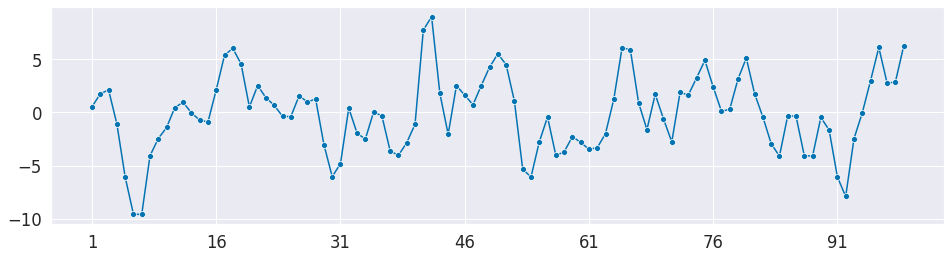

In [ ]:
# differencing
dataset_4_diff1 = dataset_4.diff().dropna()
plot_series(dataset_4_diff1)

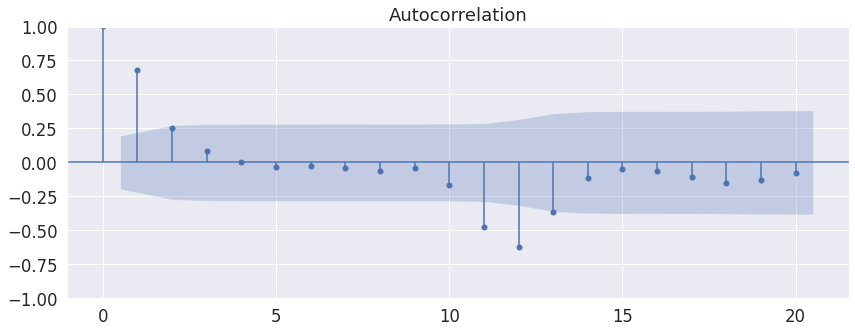

In [ ]:
# create ACF plot
plot_acf(dataset_4_diff1).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


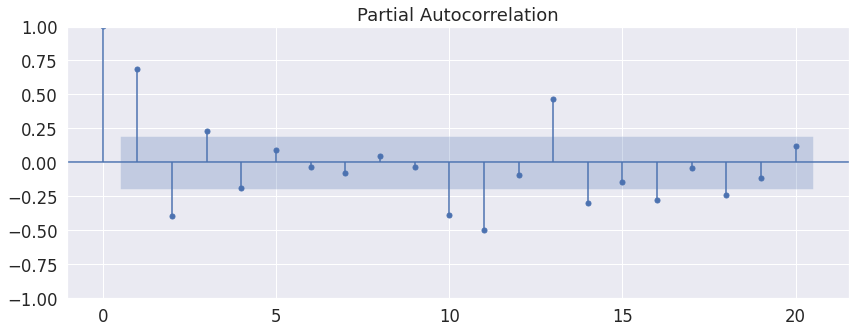

In [ ]:
# create PACF plot
plot_pacf(dataset_4_diff1).set_size_inches((14,5));

In [ ]:
# show adf result
adf_test(dataset_4_diff1)

Results of Dickey-Fuller Test:
Test Statistic                 -3.172040
p-value                         0.021661
#Lags Used                     12.000000
Number of Observations Used    86.000000
Critical Value (1%)            -3.508783
Critical Value (5%)            -2.895784
Critical Value (10%)           -2.585038
dtype: float64


**Interpretation :**

Before Differencing

There is exponential decay in the ACF plot
There is significant lag at 2 for PACF,
P-value more than 0.05, there is no evidence for rejecting null hypothesis in favor of the alternative. Hence, the series is non-stationary so we have to conduct differencing process

After Differencing

There is significant lag at 1 for ACF and damped sinusoidal for PACF, it can be said that the model from this data is ARIMA (0,1,1) / exponential smoothing

## Data 5

In [ ]:
# set dataset index
dataset_5 = dataset_5.set_index('index')
dataset_5

,value
index,
1 Jan,3.010220
1 Feb,0.500811
1 Mar,0.430380
1 Apr,3.807056
1 Mei,1.347951
...,...
8 Des,16.947572
9 Jan,19.623032
9 Feb,15.348819


In [ ]:
# reset index
dataset_5 = dataset_5.reset_index(drop = True)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

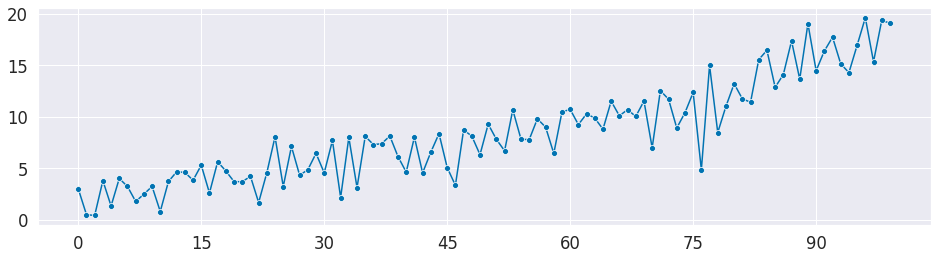

In [ ]:
# create series plot
plot_series(dataset_5)

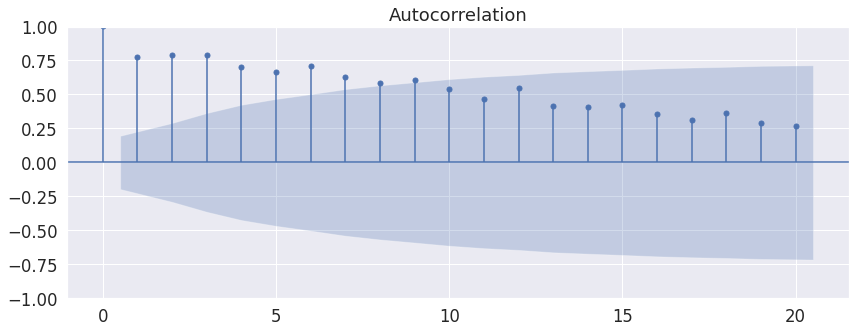

In [ ]:
# create ACF plot
plot_acf(dataset_5).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


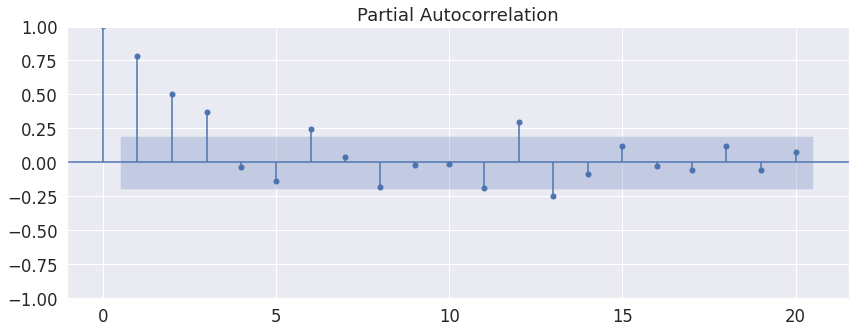

In [ ]:
# create PACF plot
plot_pacf(dataset_5).set_size_inches((14,5));

In [ ]:
# show adf result
adf_test(dataset_5)

Results of Dickey-Fuller Test:
Test Statistic                  1.965343
p-value                         0.998626
#Lags Used                     12.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

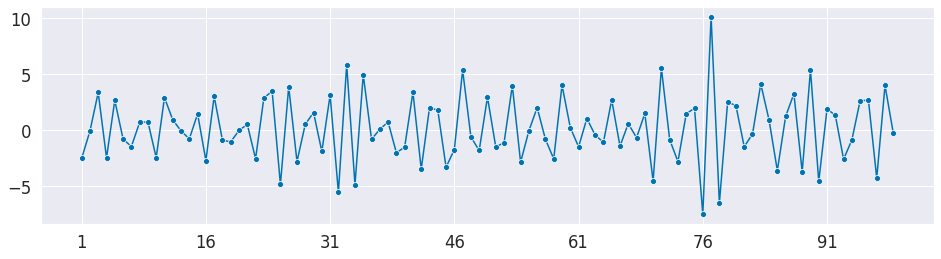

In [ ]:
# differencing
dataset_5_diff1 = dataset_5.diff().dropna()
plot_series(dataset_5_diff1)

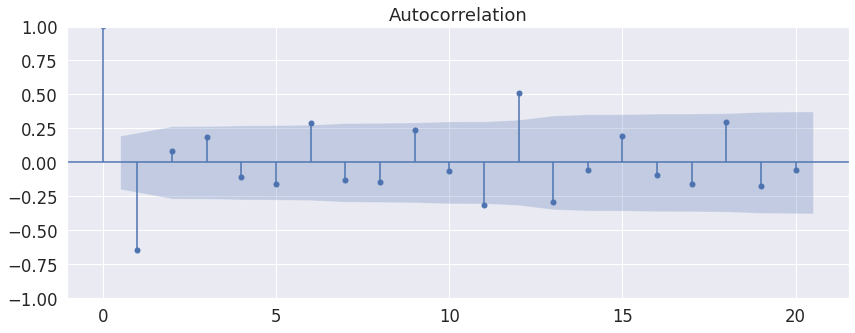

In [ ]:
# create ACF plot
plot_acf(dataset_5_diff1).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


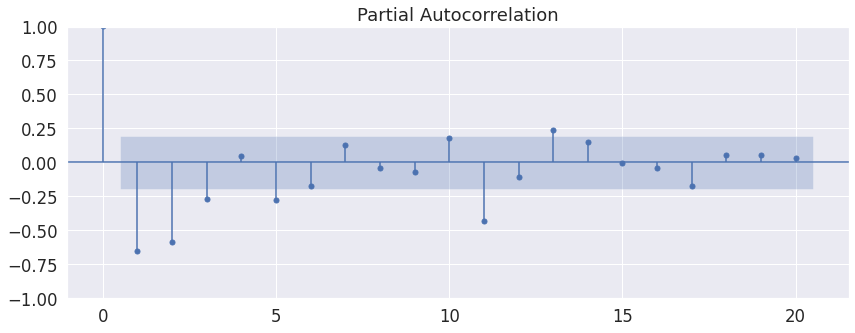

In [ ]:
# create PACF plot
plot_pacf(dataset_5_diff1).set_size_inches((14,5));

In [ ]:
# show adf result
adf_test(dataset_5_diff1)

Results of Dickey-Fuller Test:
Test Statistic                 -2.979359
p-value                         0.036867
#Lags Used                     12.000000
Number of Observations Used    86.000000
Critical Value (1%)            -3.508783
Critical Value (5%)            -2.895784
Critical Value (10%)           -2.585038
dtype: float64


**Interpretation :**

Before Differencing

There is exponential decay in the ACF plot There is significant lag at 3 for PACF, P-value more than 0.05, there is no evidence for rejecting null hypothesis in favor of the alternative. Hence, the series is non-stationary so we have to conduct differencing process

After Differencing

There is significant lag at 1 for ACF and lag at 3 for PACF, it can be said that the model from this data is ARIMA (3,1,1)

## Data 6

In [ ]:
# set dataset index
dataset_6 = dataset_6.set_index('index')
dataset_6

,value
index,
1 Jan,0.183993
1 Feb,1.712356
1 Mar,2.761235
1 Apr,2.977488
1 Mei,1.681076
...,...
8 Des,47.101730
9 Jan,81.688178
9 Feb,59.368088


In [ ]:
# reset index
dataset_6 = dataset_6.reset_index(drop = True)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

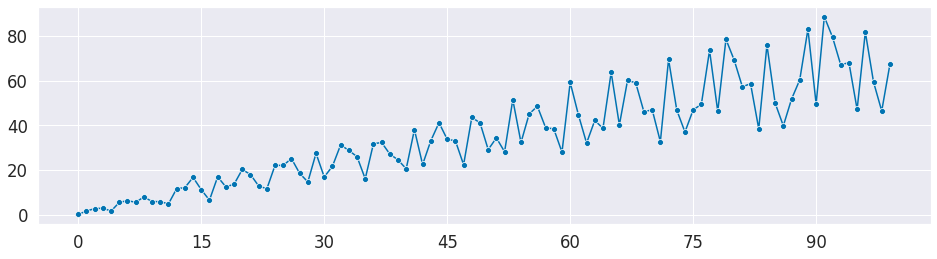

In [ ]:
# create eries plot
plot_series(dataset_6)

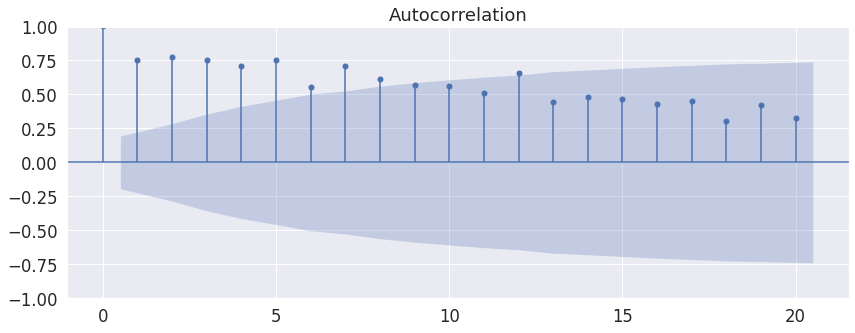

In [ ]:
# create ACF plot
plot_acf(dataset_6).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


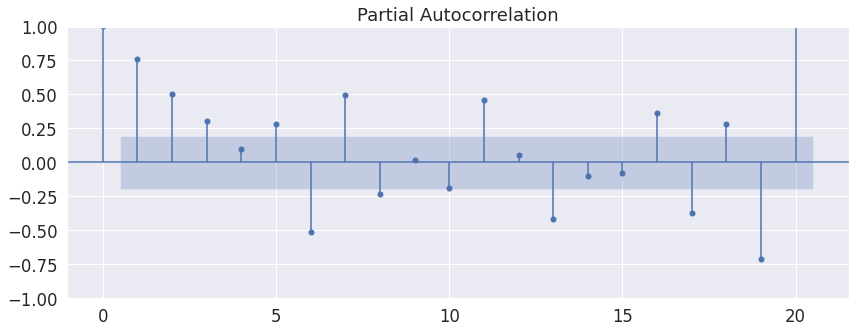

In [ ]:
# create PACF plot
plot_pacf(dataset_6).set_size_inches((14,5));

In [ ]:
# show adf result
adf_test(dataset_6)

Results of Dickey-Fuller Test:
Test Statistic                 -0.461408
p-value                         0.899330
#Lags Used                     11.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

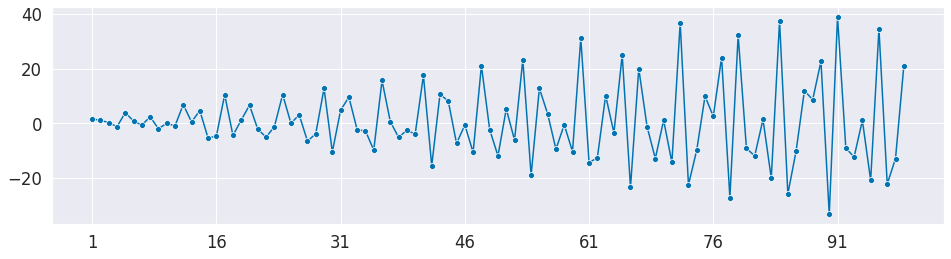

In [ ]:
# differencing
dataset_6_diff1 = dataset_6.diff().dropna()
plot_series(dataset_6_diff1)

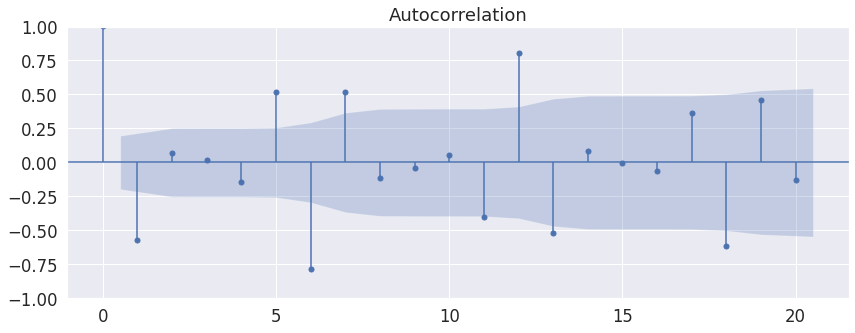

In [ ]:
# create ACF plot
plot_acf(dataset_6_diff1).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


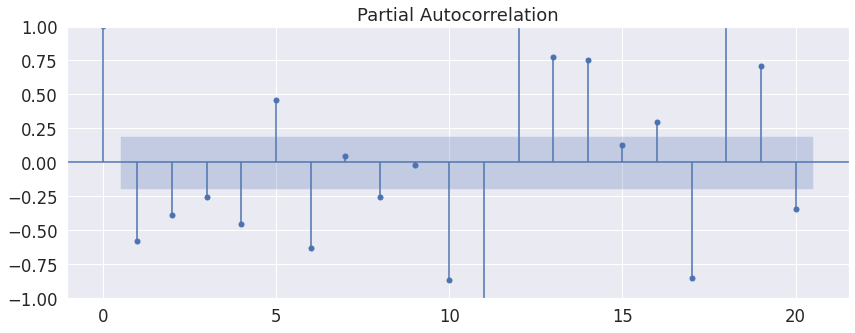

In [ ]:
# create PACF plot
plot_pacf(dataset_6_diff1).set_size_inches((14,5));

In [ ]:
# show adf result
adf_test(dataset_6_diff1)

Results of Dickey-Fuller Test:
Test Statistic                -21.948221
p-value                         0.000000
#Lags Used                     10.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64


**Interpretation :**

Before Differencing

There is exponential decay in the ACF plot There is significant lag at 3 for PACF, P-value more than 0.05, there is no evidence for rejecting null hypothesis in favor of the alternative. Hence, the series is non-stationary so we have to conduct differencing process

After Differencing

There is significant lag at 1 for ACF and lag at 6 for PACF, it can be said that the model from this data is ARIMA (6,1,1)

## Data 7

In [ ]:
# set dataset index
dataset_7 = dataset_7.set_index('index')
dataset_7

,value
index,
1 Jan,0.167240
1 Feb,4.048346
1 Mar,0.898316
1 Apr,-5.074511
1 Mei,-3.305332
...,...
8 Des,135.444059
9 Jan,156.884276
9 Feb,166.921615


In [ ]:
# reset index
dataset_7 = dataset_7.reset_index(drop = True)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

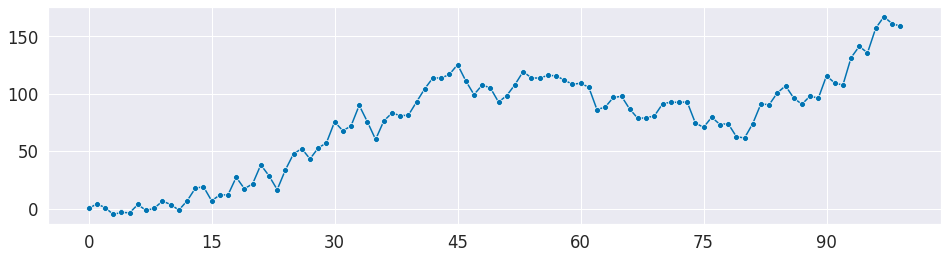

In [ ]:
# create series plot
plot_series(dataset_7)

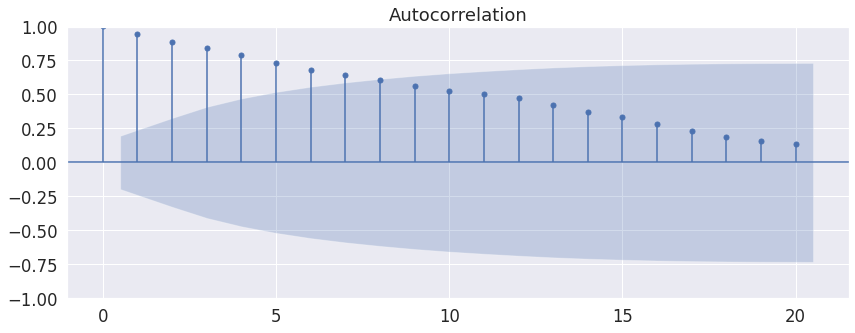

In [ ]:
# create ACF plot
plot_acf(dataset_7).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


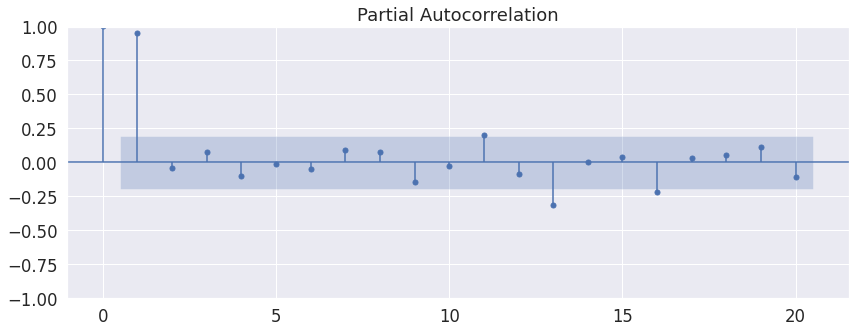

In [ ]:
# create PACF plot
plot_pacf(dataset_7).set_size_inches((14,5));

In [ ]:
# show adf result
adf_test(dataset_7)

Results of Dickey-Fuller Test:
Test Statistic                 -1.427718
p-value                         0.568918
#Lags Used                     12.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

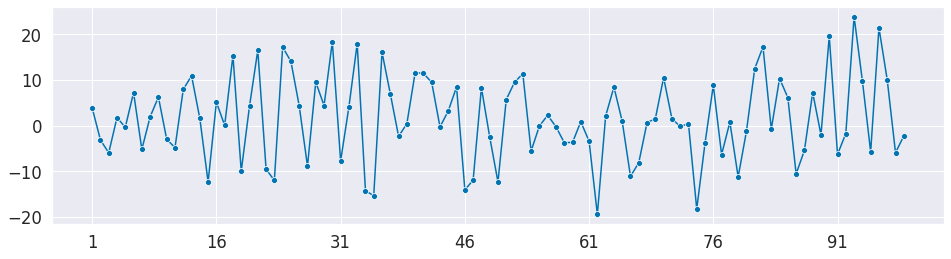

In [ ]:
# differencing
dataset_7_diff1 = dataset_7.diff().dropna()
plot_series(dataset_7_diff1)

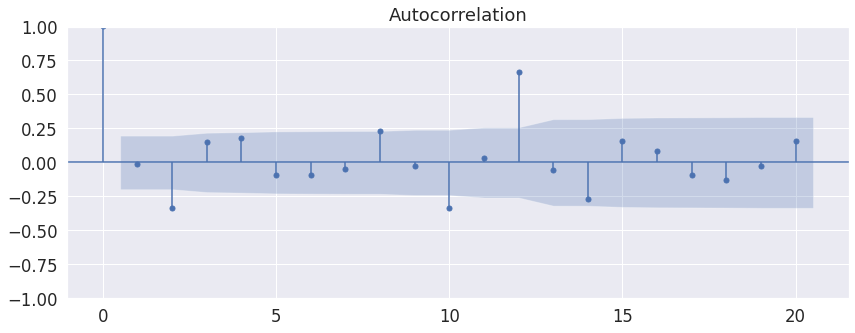

In [ ]:
# create ACF plot
plot_acf(dataset_7_diff1).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


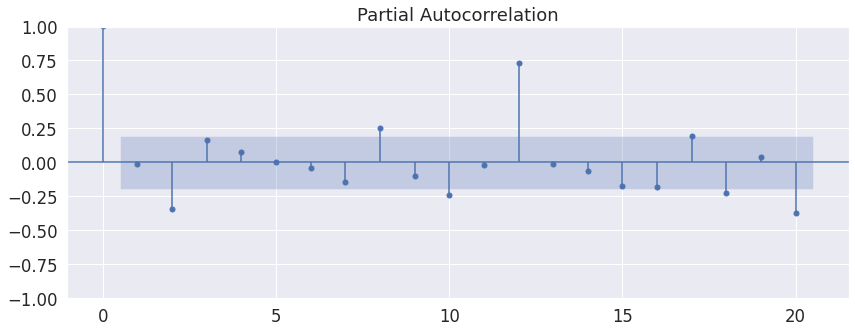

In [ ]:
# create PACF plot
plot_pacf(dataset_7_diff1).set_size_inches((14,5));

In [ ]:
# show adf result
adf_test(dataset_7_diff1)

Results of Dickey-Fuller Test:
Test Statistic                 -0.681461
p-value                         0.851493
#Lags Used                     11.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

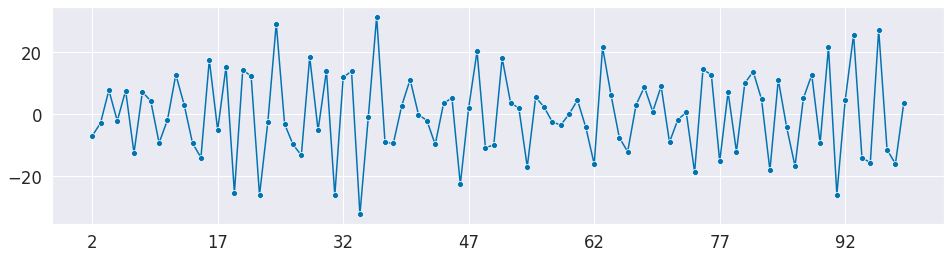

In [ ]:
# differencing
dataset_7_diff2 = dataset_7_diff1.diff().dropna()
plot_series(dataset_7_diff2)

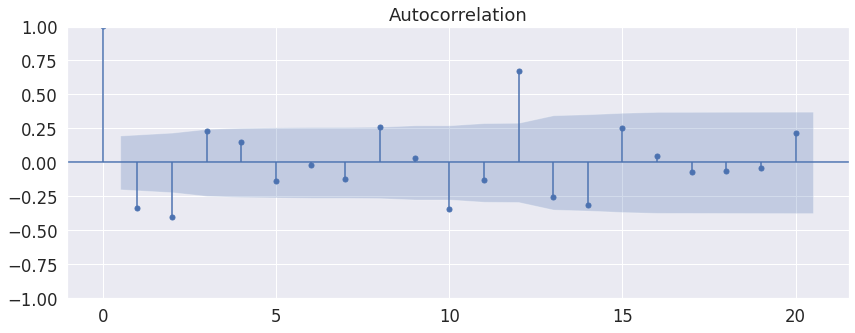

In [ ]:
# create ACF plot
plot_acf(dataset_7_diff2).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


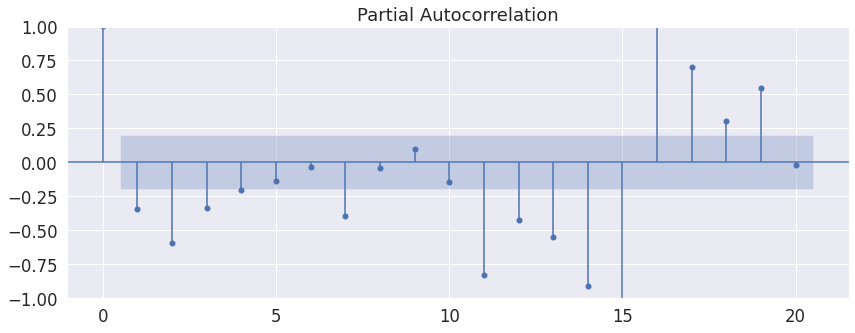

In [ ]:
# create PACF plot
plot_pacf(dataset_7_diff2).set_size_inches((14,5));

In [ ]:
# show adf result
adf_test(dataset_7_diff2)

Results of Dickey-Fuller Test:
Test Statistic                -1.001806e+01
p-value                        1.707861e-17
#Lags Used                     1.000000e+01
Number of Observations Used    8.700000e+01
Critical Value (1%)           -3.507853e+00
Critical Value (5%)           -2.895382e+00
Critical Value (10%)          -2.584824e+00
dtype: float64


**Interpretation :**

Before Differencing

There is exponential decay in the ACF plot there is significant lag at 1 for PACF, P-value more than 0.05, there is no evidence for rejecting null hypothesis in favor of the alternative. Hence, the series is non-stationary so we have to conduct differencing process

After 2 x Differencing 

There is significant lag at 1 for ACF and lag at 6 for PACF, it can be said that the model from this data is ARIMA (4,2,2)

## Data 8

In [ ]:
# set dataset index
dataset_8 = dataset_8.set_index('index')
dataset_8

,x
index,
1,13
2,14
3,8
4,10
5,16
...,...
95,15
96,25
97,22


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

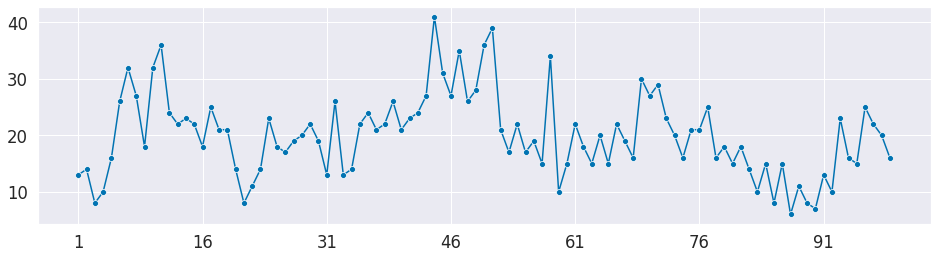

In [ ]:
# create series plot
plot_series(dataset_8)

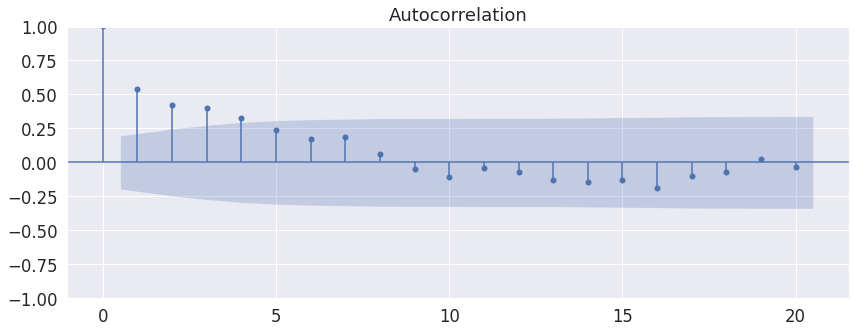

In [ ]:
# create ACF plot
plot_acf(dataset_8).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


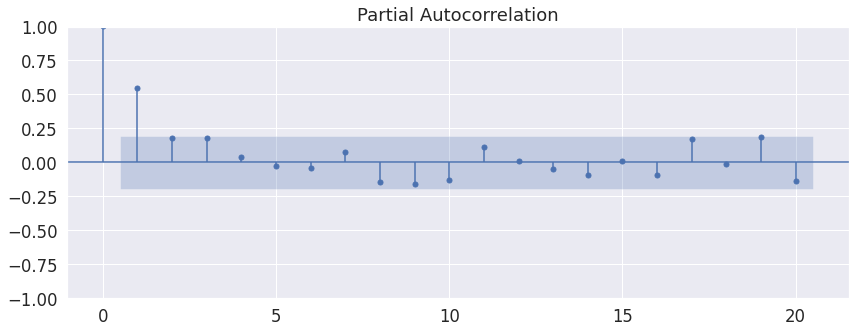

In [ ]:
# create PACF plot
plot_pacf(dataset_8).set_size_inches((14,5));

In [ ]:
# show adf result
adf_test(dataset_8)

Results of Dickey-Fuller Test:
Test Statistic                 -3.183192
p-value                         0.020978
#Lags Used                      2.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64


**Interpretation :**

1. P-value less than 0.05, there is evidence for rejecting null hypothesis in favor of the alternative. Hence, the series is stationary
2. There is exponential decay in the ACF plot there is significant lag at 1 for PACF, it can be said that the model from this data is AR(1)

## Data 9

In [ ]:
# set dataset index
dataset_9 = dataset_9.set_index('index')
dataset_9

,x
index,
1,97.85
2,104.64
3,94.36
4,98.05
5,95.85
...,...
504,79.03
505,76.56
506,78.52


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

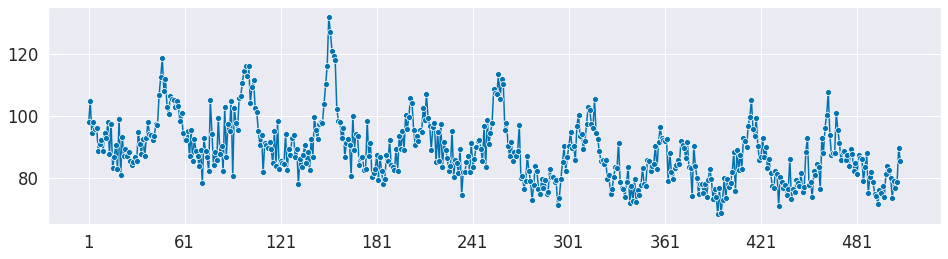

In [ ]:
# create series plot
plot_series(dataset_9)

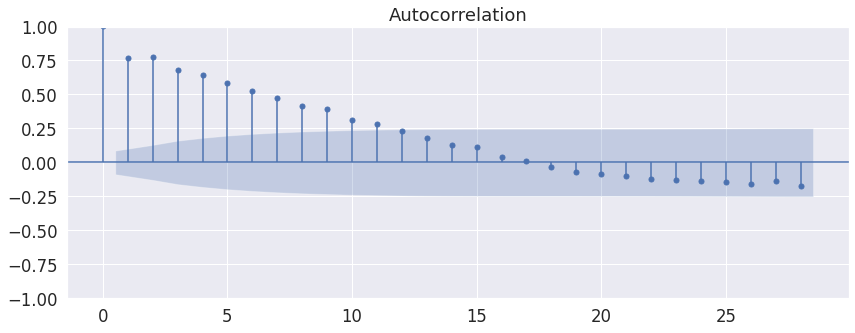

In [ ]:
# create ACF plot
plot_acf(dataset_9).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


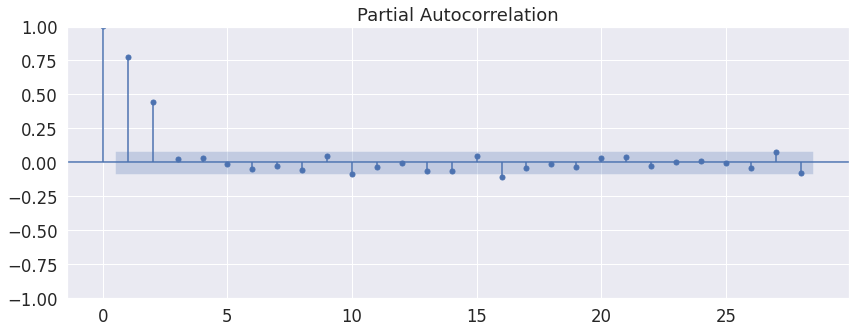

In [ ]:
# create PACF plot
plot_pacf(dataset_9).set_size_inches((14,5));

In [ ]:
# show adf result
adf_test(dataset_9)

Results of Dickey-Fuller Test:
Test Statistic                  -4.815688
p-value                          0.000051
#Lags Used                       1.000000
Number of Observations Used    506.000000
Critical Value (1%)             -3.443340
Critical Value (5%)             -2.867269
Critical Value (10%)            -2.569821
dtype: float64


**Interpretation :**

1. P-value less than 0.05, there is evidence for rejecting null hypothesis in favor of the alternative. Hence, the series is stationary 
2. There is exponential decay in the ACF plot there is significant lag at 2 for PACF, it can be said that the model from this data is AR(2)

## Data 10

In [ ]:
# set dataset index
dataset_10 = dataset_10.set_index('index')
dataset_10

,x
index,
1,11.158810
2,9.917591
3,9.824230
4,8.855909
5,9.264166
...,...
146,9.058158
147,10.359239
148,9.400482


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

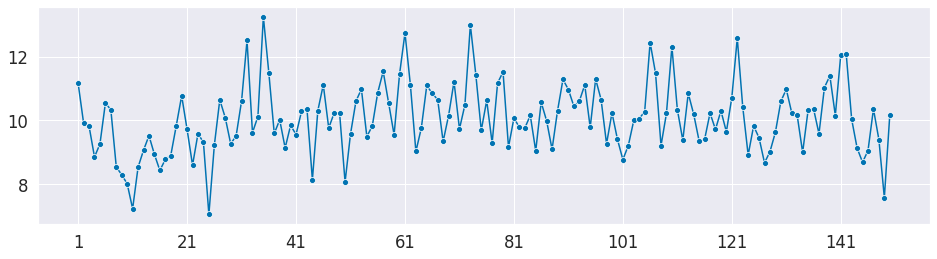

In [ ]:
# create series plot
plot_series(dataset_10)

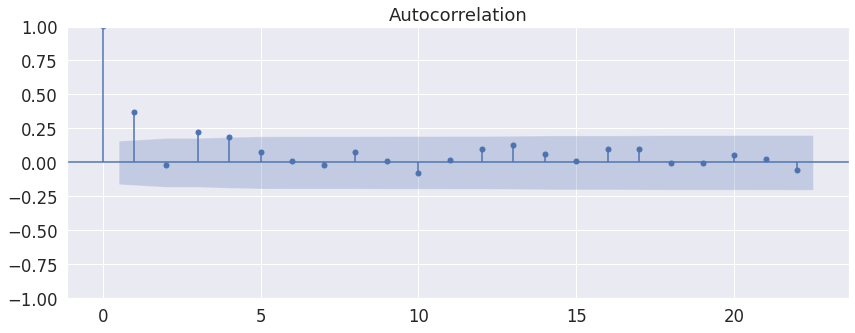

In [ ]:
# create ACF plot
plot_acf(dataset_10).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


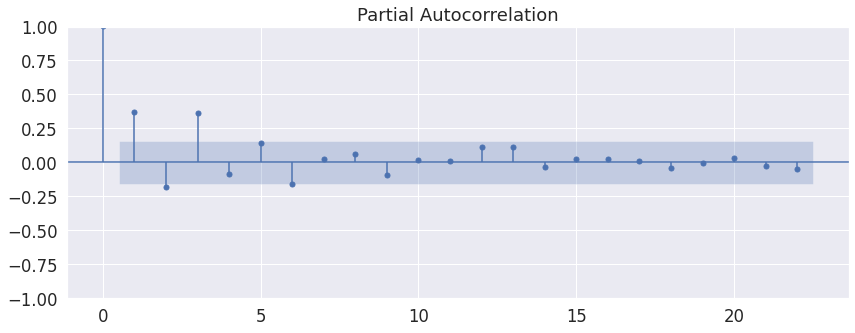

In [ ]:
# create PACF plot
plot_pacf(dataset_10).set_size_inches((14,5));

In [ ]:
# show adf result
adf_test(dataset_10)

Results of Dickey-Fuller Test:
Test Statistic                  -4.112777
p-value                          0.000922
#Lags Used                       5.000000
Number of Observations Used    144.000000
Critical Value (1%)             -3.476598
Critical Value (5%)             -2.881829
Critical Value (10%)            -2.577589
dtype: float64


**Interpretation :**

1. P-value less than 0.05, there is evidence for rejecting null hypothesis in favor of the alternative. Hence, the series is stationary
2. There is significant lag at 1 for ACF and damped sinusoidal for PACF, it can be said that the model from this data is MA (1)

# Advance

The business division of the Growth asks you to analyze transactions that occur on the e-commerce platform on a daily basis and you are also asked to do forecasting which results from the forecasting will be used to formulate future strategies. The following is the metadata of the data to be analyzed:

* 'Row ID' - This is nothing but Serial No.
* 'Order ID' - ID created when a product order is placed.
* 'Order Date' - Date on which a customer places his/her order.
* 'Ship Date' - Date on which the order is shipped.
* 'Ship Mode' - Mode of shipment of each order.
* 'Customer ID' - ID assigned to each customer who places an order.
* 'Customer Name' - Name of Customer.
* 'Segment' - Section from where the order is placed.
* 'Country' - Country details of this data set. We are looking only for US store data.
* 'City' - Cities of US are listed here.
* 'State' - States of US are listed here.
* 'Postal Code' - pin code
* 'Region' - grouped into region wise
* 'Product ID' - Product ID of each product
* 'Category' - Category to which each product belongs to.
* 'Sub-Category' - Sub-Category of each Category
* 'Product Name' - Name of products.
* 'Sales' - Selling Price of each product.
* 'Quantity' - number of quantity available for a particular product.
* 'Discount' - Discount available on each product.
* 'Profit' - Profit gained on each product.

## Number 1


Calculate the number of buyers, number of transactions, GMV, and profit earned with the following timeframe: (point 5)
1. Daily
2. Weekly
3. Monthly

In [ ]:
# read dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/time_series_data/superstore_time_series_dataset/superstore_train.csv", parse_dates=['Order Date'],)

In [ ]:
# show dataset
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# check null value
dataset.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
# show data info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         8000 non-null   int64         
 1   Order ID       8000 non-null   object        
 2   Order Date     8000 non-null   datetime64[ns]
 3   Ship Date      8000 non-null   object        
 4   Ship Mode      8000 non-null   object        
 5   Customer ID    8000 non-null   object        
 6   Customer Name  8000 non-null   object        
 7   Segment        8000 non-null   object        
 8   Country        8000 non-null   object        
 9   City           8000 non-null   object        
 10  State          8000 non-null   object        
 11  Postal Code    8000 non-null   int64         
 12  Region         8000 non-null   object        
 13  Product ID     8000 non-null   object        
 14  Category       8000 non-null   object        
 15  Sub-Category   8000 n

In [182]:
# convert to datetime
dataset["Order Date"] = pd.to_datetime(dataset["Order Date"],format="%Y-%m-%d")
dataset["Ship Date"] = pd.to_datetime(dataset["Ship Date"])

In [ ]:
# convert to datetime
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         8000 non-null   int64         
 1   Order ID       8000 non-null   object        
 2   Order Date     8000 non-null   datetime64[ns]
 3   Ship Date      8000 non-null   datetime64[ns]
 4   Ship Mode      8000 non-null   object        
 5   Customer ID    8000 non-null   object        
 6   Customer Name  8000 non-null   object        
 7   Segment        8000 non-null   object        
 8   Country        8000 non-null   object        
 9   City           8000 non-null   object        
 10  State          8000 non-null   object        
 11  Postal Code    8000 non-null   int64         
 12  Region         8000 non-null   object        
 13  Product ID     8000 non-null   object        
 14  Category       8000 non-null   object        
 15  Sub-Category   8000 n

In [ ]:
# check missing value and unique value
for column in dataset.columns:
    print(f"============= {column} =================")
    display(dataset[column].value_counts())
    print()

============= Row ID =================


1       1
5330    1
5343    1
5342    1
5341    1
       ..
2662    1
2661    1
2660    1
2659    1
8000    1
Name: Row ID, Length: 8000, dtype: int64


============= Order ID =================


CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
US-2015-126977    10
                  ..
CA-2014-123295     1
CA-2017-150931     1
CA-2015-155124     1
US-2014-167633     1
CA-2014-116673     1
Name: Order ID, Length: 3962, dtype: int64


============= Order Date =================


2016-09-05    37
2017-12-09    31
2017-09-02    30
2016-11-10    29
2017-12-02    28
              ..
2014-01-15     1
2014-02-14     1
2016-08-20     1
2016-06-29     1
2016-07-20     1
Name: Order Date, Length: 1181, dtype: int64


============= Ship Date =================


2017-09-26    32
2015-12-16    30
2017-12-12    30
2017-09-15    29
2017-09-06    29
              ..
2015-06-14     1
2017-05-13     1
2015-08-13     1
2017-01-10     1
2015-10-11     1
Name: Ship Date, Length: 1279, dtype: int64


============= Ship Mode =================


Standard Class    4788
Second Class      1565
First Class       1220
Same Day           427
Name: Ship Mode, dtype: int64


============= Customer ID =================


JL-15835    33
WB-21850    33
PP-18955    31
AP-10915    31
ZC-21910    30
            ..
KD-16615     1
CS-12490     1
RH-19555     1
JR-15700     1
FW-14395     1
Name: Customer ID, Length: 784, dtype: int64


============= Customer Name =================


John Lee            33
William Brown       33
Paul Prost          31
Arthur Prichep      31
Zuschuss Carroll    30
                    ..
Ken Dana             1
Cindy Schnelling     1
Ritsa Hightower      1
Jocasta Rupert       1
Fred Wasserman       1
Name: Customer Name, Length: 784, dtype: int64


============= Segment =================


Consumer       4192
Corporate      2376
Home Office    1432
Name: Segment, dtype: int64


============= Country =================


United States    8000
Name: Country, dtype: int64


============= City =================


New York City    743
Los Angeles      596
Philadelphia     443
San Francisco    417
Seattle          336
                ... 
Antioch            1
Conroe             1
Pensacola          1
Tinley Park        1
Ormond Beach       1
Name: City, Length: 502, dtype: int64


============= State =================


California              1608
New York                 912
Texas                    734
Pennsylvania             480
Washington               397
Illinois                 384
Ohio                     361
Florida                  296
Michigan                 213
North Carolina           200
Arizona                  191
Virginia                 172
Colorado                 165
Georgia                  151
Tennessee                132
Kentucky                 122
Indiana                  122
Oregon                   107
Massachusetts            100
New Jersey                95
Maryland                  91
Wisconsin                 88
Minnesota                 80
Delaware                  74
Connecticut               66
Alabama                   54
Arkansas                  54
Oklahoma                  52
Mississippi               49
Utah                      49
Missouri                  49
Rhode Island              47
South Carolina            42
Louisiana                 37
Nebraska      


============= Postal Code =================


10035    207
10009    189
10024    183
10011    164
94122    162
        ... 
98270      1
14701      1
77536      1
92253      1
52240      1
Name: Postal Code, Length: 598, dtype: int64


============= Region =================


West       2605
East       2270
Central    1816
South      1309
Name: Region, dtype: int64


============= Product ID =================


TEC-AC-10002049    15
FUR-FU-10004270    14
OFF-PA-10001970    14
TEC-AC-10003832    14
TEC-AC-10003628    13
                   ..
OFF-ST-10002292     1
TEC-MA-10004241     1
FUR-FU-10003424     1
FUR-BO-10002206     1
FUR-BO-10001567     1
Name: Product ID, Length: 1831, dtype: int64


============= Category =================


Office Supplies    4840
Furniture          1691
Technology         1469
Name: Category, dtype: int64


============= Sub-Category =================


Binders        1214
Paper          1099
Furnishings     753
Phones          720
Storage         680
Art             648
Accessories     600
Chairs          502
Appliances      362
Labels          291
Tables          254
Envelopes       216
Bookcases       182
Fasteners       181
Supplies        149
Machines         95
Copiers          54
Name: Sub-Category, dtype: int64


============= Product Name =================


Staples                                                                     43
Staple envelope                                                             40
Easy-staple paper                                                           33
Avery Non-Stick Binders                                                     20
Staples in misc. colors                                                     17
                                                                            ..
Avery 5                                                                      1
Sauder Facets Collection Locker/File Cabinet, Sky Alder Finish               1
Star Micronics TSP800 TSP847IIU Receipt Printer                              1
Nu-Dell Oak Frame                                                            1
Bush Westfield Collection Bookcases, Dark Cherry Finish, Fully Assembled     1
Name: Product Name, Length: 1819, dtype: int64


============= Sales =================


12.960     45
15.552     32
10.368     30
19.440     30
32.400     22
           ..
49.440      1
60.984      1
195.466     1
59.200      1
57.680      1
Name: Sales, Length: 5186, dtype: int64


============= Quantity =================


3     1952
2     1892
5      973
4      965
1      726
7      482
6      459
9      215
8      210
10      42
11      26
14      21
12      20
13      17
Name: Quantity, dtype: int64


============= Discount =================


0.00    3897
0.20    2916
0.70     341
0.80     219
0.30     169
0.40     166
0.60      99
0.10      73
0.50      53
0.15      41
0.32      18
0.45       8
Name: Discount, dtype: int64


============= Profit =================


0.0000     51
6.2208     33
9.3312     30
3.6288     28
5.4432     27
           ..
17.5200     1
1.5588      1
9.5448      1
56.9943     1
19.0344     1
Name: Profit, Length: 6295, dtype: int64

In [ ]:
# create GMV column
dataset['GMV'] = dataset["Quantity"]*(dataset["Sales"] - dataset["Discount"]*dataset['Sales'])
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,GMV
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.920000
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.820000
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,29.240000
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2633.338125
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,35.788800


### Number of Customer

In [ ]:
# get days data from order date
dataset["days"] = dataset['Order Date'].dt.day

# get weeks data from order date
dataset["weekdays"] = [x.strftime('%A') for x in dataset["Order Date"]]

# get months data from order date
dataset["months"] = dataset["Order Date"].dt.month

In [ ]:
# aggregating total daily customer
customer_daily = dataset.groupby("days",as_index=False).agg({"Customer ID":lambda x: x.nunique()})

# aggregating total weekly customer
order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
customer_weekdays = dataset.groupby("weekdays",as_index=False).agg({"Customer ID":lambda x: x.nunique()})

# aggregating total monthly customer
customer_monthly = dataset.groupby("months",as_index=False).agg({"Customer ID":lambda x: x.nunique()})

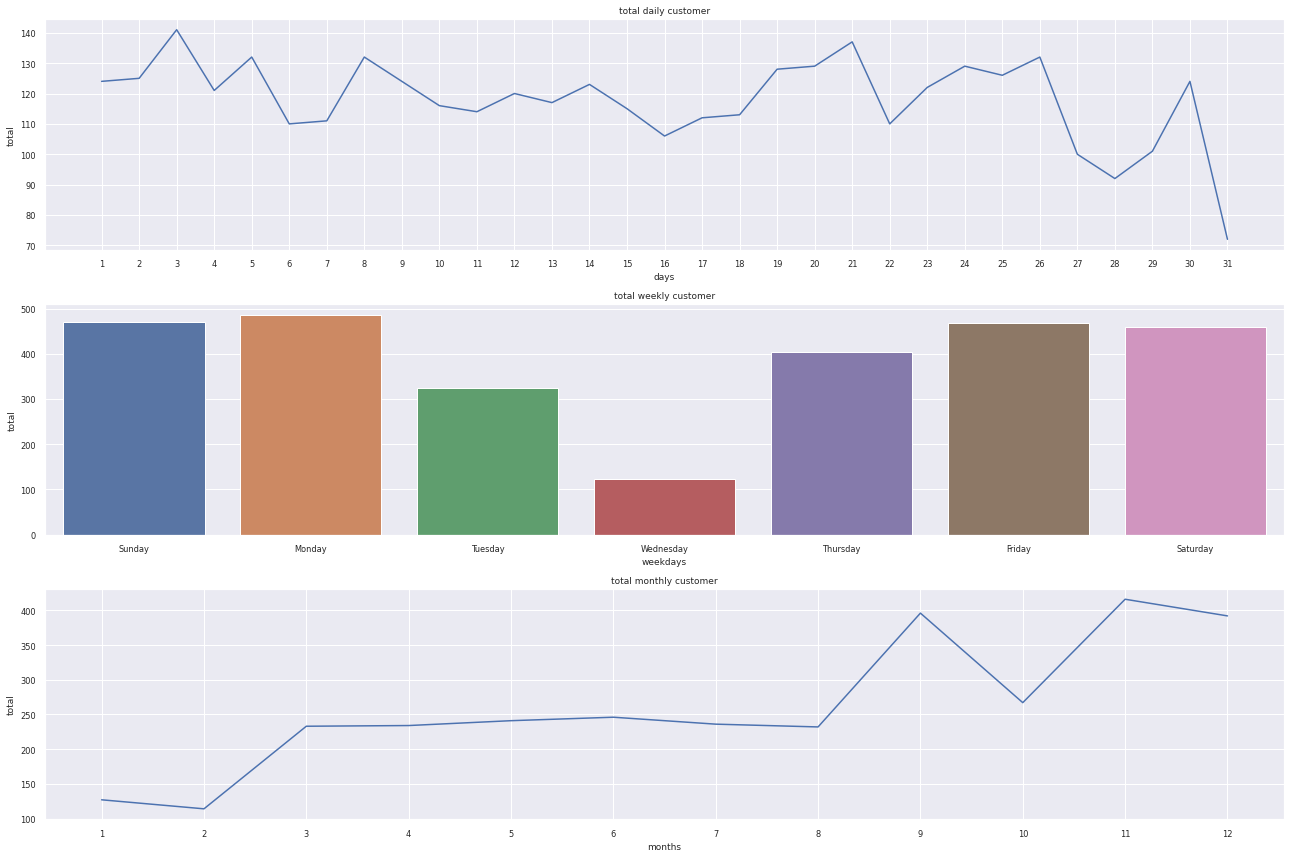

In [ ]:
# visualization
plt.figure(figsize=(18,12))
plt.subplot(311)
sns.lineplot(data=customer_daily,x="days",y="Customer ID").set_title("total daily customer")
plt.xticks([i for i in np.arange(1,32)])
plt.ylabel("total")

plt.subplot(312)
sns.barplot(data=customer_weekdays,x="weekdays",y="Customer ID",order=order).set_title("total weekly customer")
plt.ylabel("total")

plt.subplot(313)
sns.lineplot(data=customer_monthly,x="months",y="Customer ID").set_title("total monthly customer")
plt.xticks([i for i in np.arange(1,13)])
plt.ylabel("total")

plt.tight_layout()
plt.show()

### Number of Transaction

In [ ]:
dataset.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'GMV',
       'days', 'weekdays', 'months'],
      dtype='object')

In [ ]:
# aggregating total daily transaction
trans_daily = dataset.groupby("days",as_index=False)["Order ID"].size()

# aggregating total weekly transaction
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
trans_weekdays = dataset.groupby("weekdays",as_index=False)["Order ID"].size()

# aggregating total monthly transaction
trans_months = dataset.groupby("months",as_index=False)["Order ID"].size()

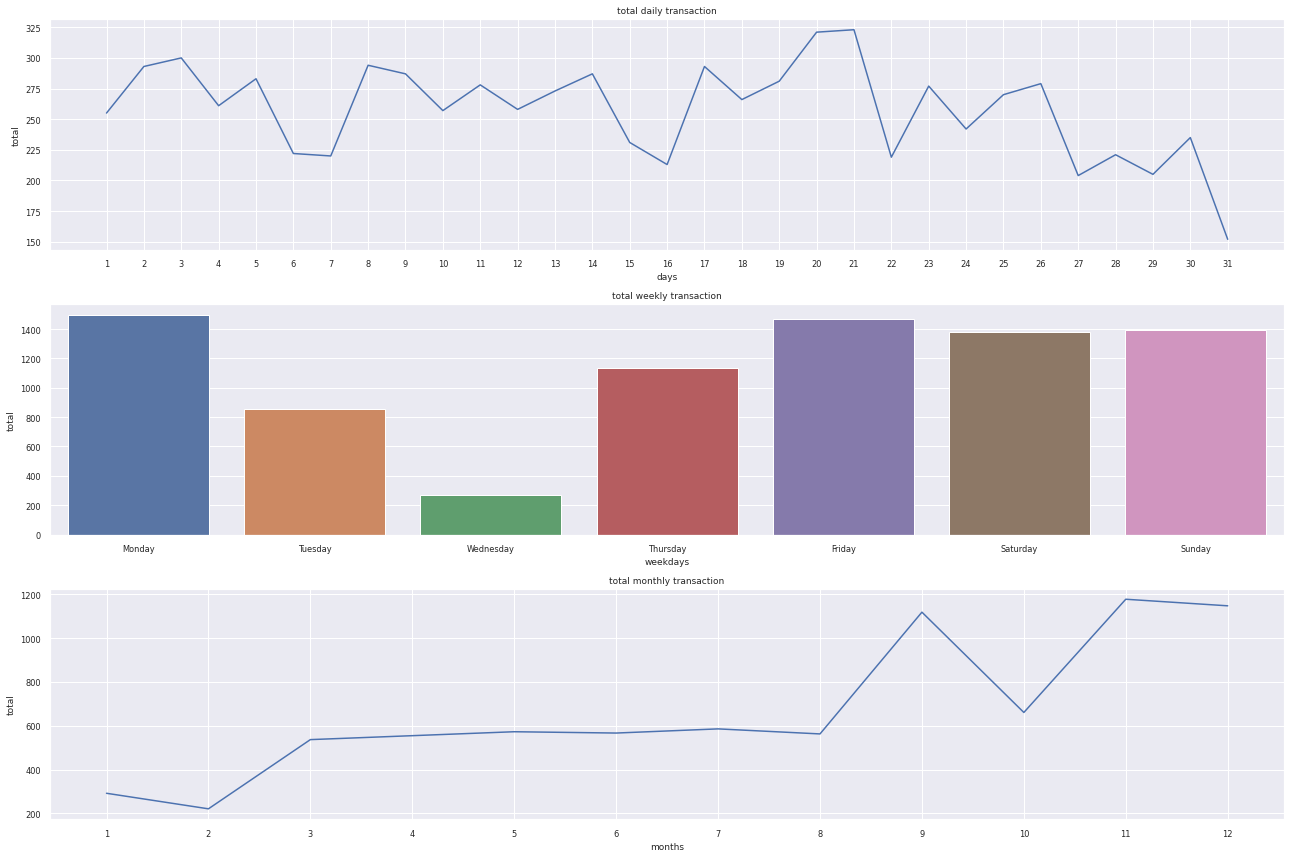

In [ ]:
# visualization
plt.figure(figsize=(18,12))
plt.subplot(311)
sns.lineplot(data=trans_daily,x="days",y="size").set_title("total daily transaction")
plt.xticks([i for i in np.arange(1,32)])
plt.ylabel("total")

plt.subplot(312)
sns.barplot(data=trans_weekdays,x="weekdays",y="size",order=order).set_title("total weekly transaction")
plt.ylabel("total")

plt.subplot(313)
sns.lineplot(data=trans_months,x="months",y="size").set_title("total monthly transaction")
plt.xticks([i for i in np.arange(1,13)])
plt.ylabel("total")

plt.tight_layout()
plt.show()

### Number of GMV

In [ ]:
# aggregating total daily GMV
gmv_daily = dataset.groupby("days",as_index=False)["GMV"].sum()

# aggregating total weekly GMV
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
gmv_weekdays = dataset.groupby("weekdays",as_index=False)["GMV"].sum()

# aggregating total monthly GMV
gmv_months = dataset.groupby("months",as_index=False)["GMV"].sum()

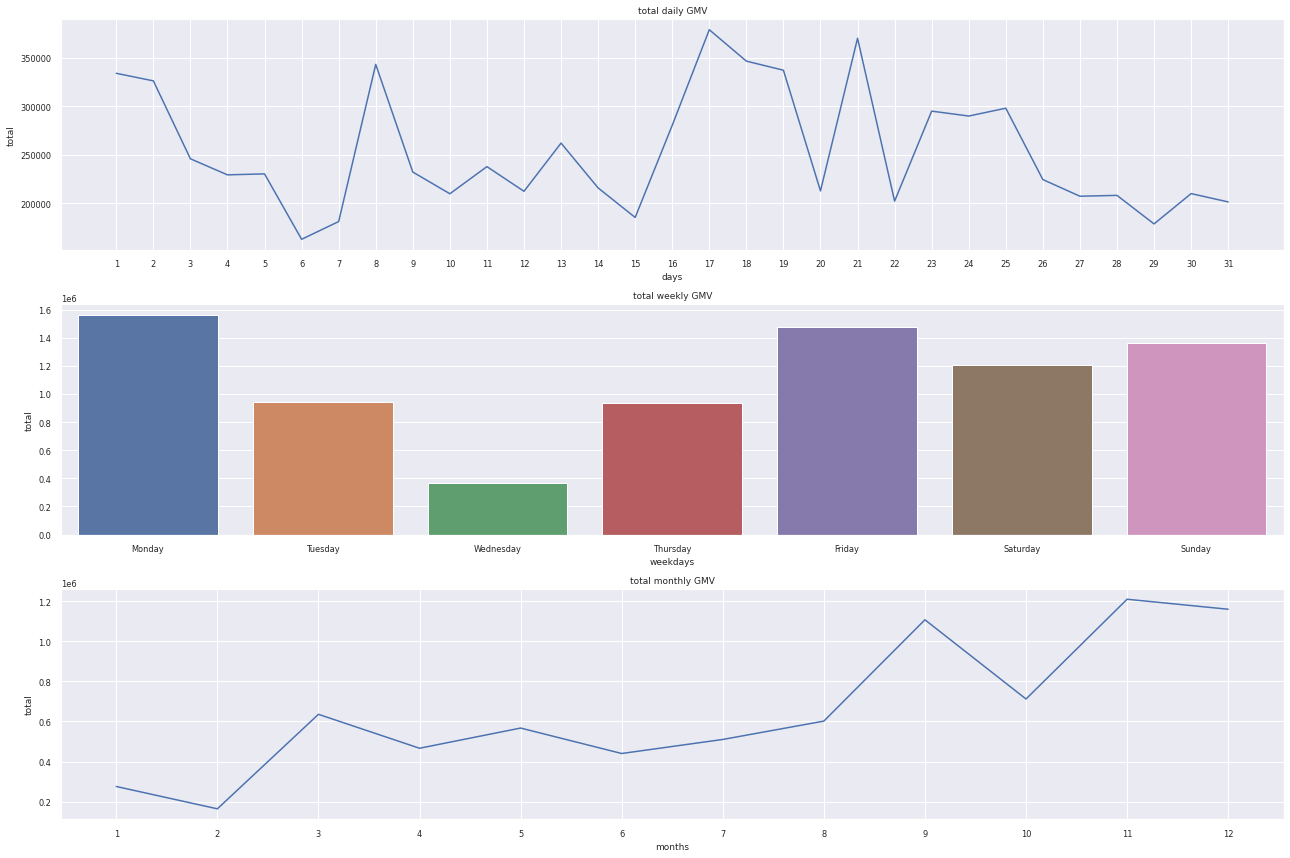

In [ ]:
# visualization
plt.figure(figsize=(18,12))
plt.subplot(311)
sns.lineplot(data=gmv_daily,x="days",y="GMV").set_title("total daily GMV")
plt.xticks([i for i in np.arange(1,32)])
plt.ylabel("total")

plt.subplot(312)
sns.barplot(data=gmv_weekdays,x="weekdays",y="GMV",order=order).set_title("total weekly GMV")
plt.ylabel("total")

plt.subplot(313)
sns.lineplot(data=gmv_months,x="months",y="GMV").set_title("total monthly GMV")
plt.xticks([i for i in np.arange(1,13)])
plt.ylabel("total")

plt.tight_layout()
plt.show()

### Number of Profit

In [ ]:
# aggregating total daily profit
profit_daily = dataset.groupby("days",as_index=False)["Profit"].sum()

# aggregating total weekly profit
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
profit_weekdays = dataset.groupby("weekdays",as_index=False)["Profit"].sum()

# aggregating total monthly profit
profit_months = dataset.groupby("months",as_index=False)["Profit"].sum()

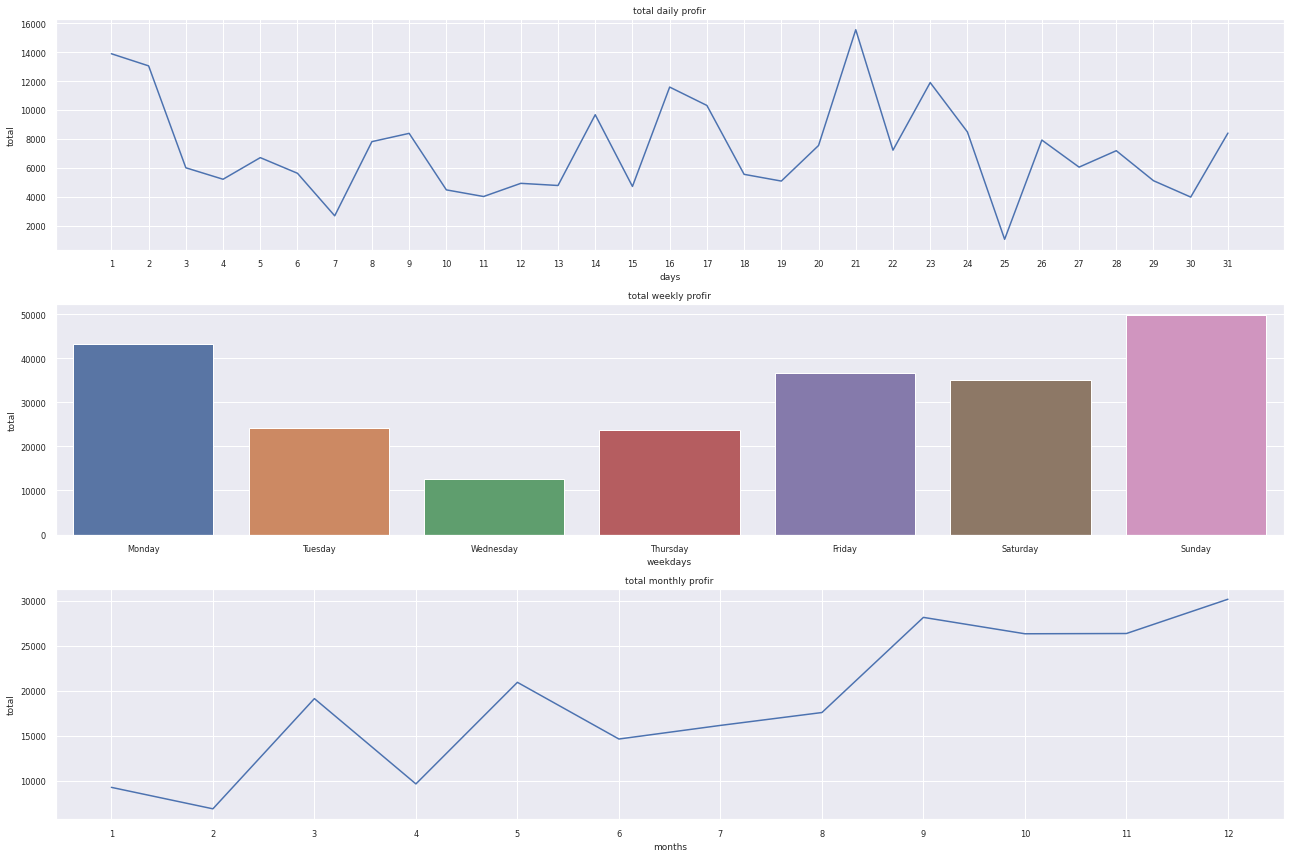

In [ ]:
# visualization
plt.figure(figsize=(18,12))
plt.subplot(311)
sns.lineplot(data=profit_daily,x="days",y="Profit").set_title("total daily profir")
plt.xticks([i for i in np.arange(1,32)])
plt.ylabel("total")

plt.subplot(312)
sns.barplot(data=profit_weekdays,x="weekdays",y="Profit",order=order).set_title("total weekly profir")
plt.ylabel("total")

plt.subplot(313)
sns.lineplot(data=profit_months,x="months",y="Profit").set_title("total monthly profir")
plt.xticks([i for i in np.arange(1,13)])
plt.ylabel("total")

plt.tight_layout()
plt.show()

## Number 2

Calculate the monthly retention of transaction activities that occur in the e-commerce platform

In [ ]:
retention_data = dataset.copy()
import datetime as dt

# function that converts date to year month

def get_month(x):
    return dt.datetime(x.year, x.month, 1)
  
# create Transaction Month period column
retention_data['Transaction Month'] = retention_data['Order Date'].apply(get_month)

retention_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,GMV,days,weekdays,months,Transaction Month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.920000,8,Tuesday,11,2016-11-01
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.820000,8,Tuesday,11,2016-11-01
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,29.240000,12,Sunday,6,2016-06-01
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2633.338125,11,Sunday,10,2015-10-01
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,35.788800,11,Sunday,10,2015-10-01


In [ ]:
# group by customerID and select only the Transaction Month column

grouping = retention_data.groupby('Customer ID')['Transaction Month']

# take the earliest date of each customer and assign it back to the orignal dataset

retention_data['CohortMonth'] = grouping.transform('min')
retention_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,GMV,days,weekdays,months,Transaction Month,CohortMonth
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.9136,523.920000,8,Tuesday,11,2016-11-01,2015-10-01
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.5820,2195.820000,8,Tuesday,11,2016-11-01,2015-10-01
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2,0.00,6.8714,29.240000,12,Sunday,6,2016-06-01,2016-06-01
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,2633.338125,11,Sunday,10,2015-10-01,2015-10-01
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2,0.20,2.5164,35.788800,11,Sunday,10,2015-10-01,2015-10-01


In [184]:
retention_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row ID             8000 non-null   int64         
 1   Order ID           8000 non-null   object        
 2   Order Date         8000 non-null   datetime64[ns]
 3   Ship Date          8000 non-null   datetime64[ns]
 4   Ship Mode          8000 non-null   object        
 5   Customer ID        8000 non-null   object        
 6   Customer Name      8000 non-null   object        
 7   Segment            8000 non-null   object        
 8   Country            8000 non-null   object        
 9   City               8000 non-null   object        
 10  State              8000 non-null   object        
 11  Postal Code        8000 non-null   int64         
 12  Region             8000 non-null   object        
 13  Product ID         8000 non-null   object        
 14  Category

In [ ]:
# This function gets us the integer value of year, month and day

def get_date_int(retention_data, column):
   year = retention_data[column].dt.year
   month = retention_data[column].dt.month
   day = retention_data[column].dt.day
   return year, month, day
  
# Get the integers for the date parts from the 'Transaction Month' column
transcation_year, transcation_month, transcation_day = get_date_int(retention_data, 'Transaction Month')

# Get the integers for date parts from the 'Cohortmonth' column
cohort_year, cohort_month, cohort_day = get_date_int(retention_data, 'CohortMonth')

# Calculate difference in years
years_diff = transcation_year - cohort_year

# Calculate difference in months
months_diff = transcation_month - cohort_month

# Extract the difference in months from all previous values
retention_data['CohortIndex'] = years_diff * 12 + months_diff + 1
retention_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Quantity,Discount,Profit,GMV,days,weekdays,months,Transaction Month,CohortMonth,CohortIndex
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,2,0.00,41.9136,523.920000,8,Tuesday,11,2016-11-01,2015-10-01,14
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,3,0.00,219.5820,2195.820000,8,Tuesday,11,2016-11-01,2015-10-01,14
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,2,0.00,6.8714,29.240000,12,Sunday,6,2016-06-01,2016-06-01,1
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,5,0.45,-383.0310,2633.338125,11,Sunday,10,2015-10-01,2015-10-01,1
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,2,0.20,2.5164,35.788800,11,Sunday,10,2015-10-01,2015-10-01,1


In [175]:
# Calculate Retention Rate per cohort
grouping = retention_data.groupby(['CohortMonth', 'CohortIndex'])

# Count the number of unique values per Customer ID
cohort_data = grouping['Customer ID'].apply(pd.Series.nunique).reset_index()

# Create a pivot
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Customer ID')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2014-01-01,100.0,NaN,NaN,7.4,7.4,NaN,7.4,3.7,3.7,11.1,...,14.8,11.1,18.5,11.1,3.7,3.7,22.2,33.3,22.2,14.8
2014-02-01,100.0,5.9,5.9,NaN,NaN,11.8,5.9,17.6,5.9,5.9,...,11.8,5.9,23.5,NaN,5.9,23.5,5.9,29.4,NaN,NaN
2014-03-01,100.0,5.9,2.0,13.7,9.8,NaN,9.8,3.9,7.8,7.8,...,11.8,13.7,9.8,11.8,25.5,3.9,21.6,17.6,NaN,NaN
2014-04-01,100.0,6.8,NaN,6.8,4.5,6.8,6.8,13.6,11.4,2.3,...,11.4,11.4,13.6,15.9,13.6,13.6,20.5,NaN,NaN,NaN
2014-05-01,100.0,10.2,6.1,4.1,16.3,6.1,16.3,16.3,6.1,4.1,...,10.2,8.2,30.6,16.3,22.4,16.3,NaN,NaN,NaN,NaN
2014-06-01,100.0,4.9,NaN,7.3,4.9,14.6,9.8,2.4,9.8,12.2,...,4.9,22.0,7.3,29.3,22.0,NaN,NaN,NaN,NaN,NaN
2014-07-01,100.0,8.8,11.8,NaN,14.7,20.6,8.8,2.9,17.6,2.9,...,17.6,8.8,23.5,17.6,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-01,100.0,11.1,4.4,13.3,6.7,4.4,6.7,4.4,8.9,2.2,...,26.7,17.8,17.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-01,100.0,6.2,10.8,12.3,1.5,4.6,7.7,10.8,9.2,1.5,...,16.9,16.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
retention.index = retention.index.strftime('%Y-%m')
retention.index

Index(['2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
       '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07',
       '2017-09', '2017-10', '2017-11'],
      dtype='object', name='CohortMonth')

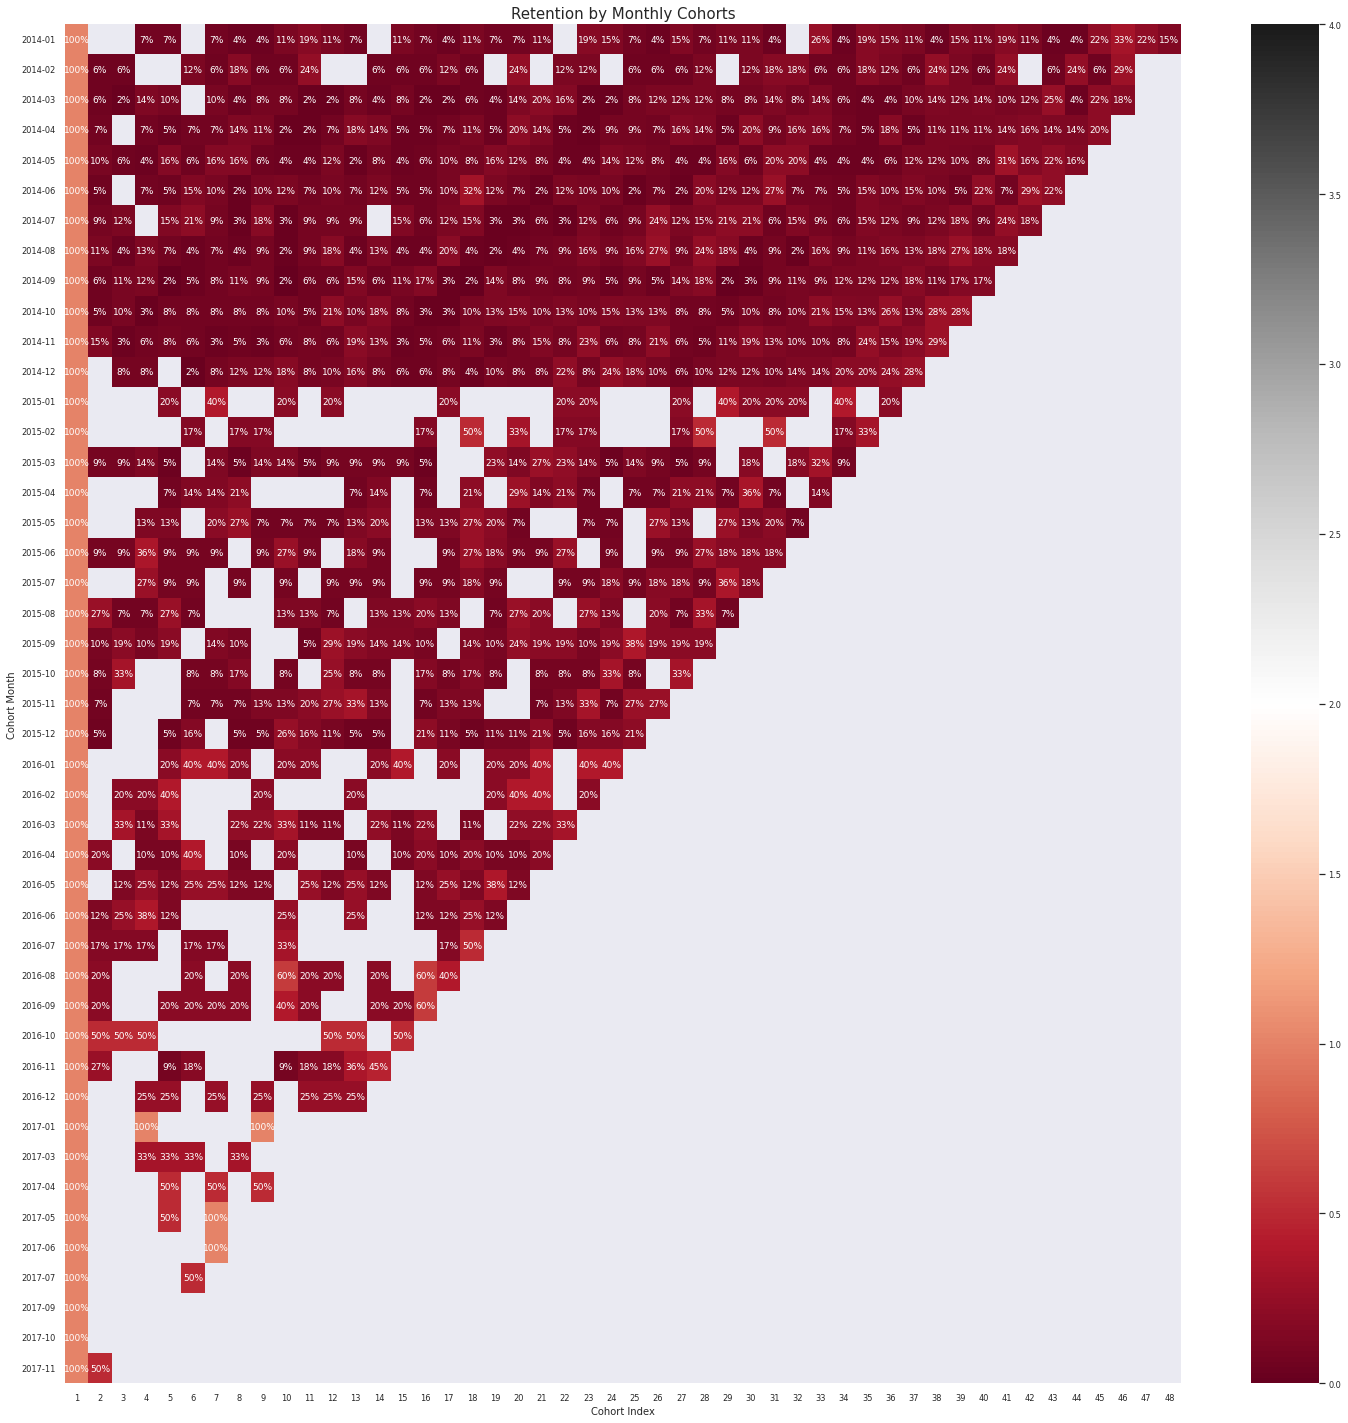

In [192]:
# Initialize inches plot figure
plt.figure(figsize=(25,25))
sns.set(font_scale=0.75)

# Add a title
plt.title('Retention by Monthly Cohorts', fontsize = 15)

# Create the heatmap
sns.heatmap(data=retention, annot = True, cmap = "RdGy", vmin = 0.0,
vmax = list(retention.max().sort_values(ascending = False))[1]+3, fmt = '.0%')
plt.ylabel('Cohort Month', fontsize = 10)
plt.xlabel('Cohort Index', fontsize = 10)
plt.yticks( rotation='360')
plt.show();

## Number 3

Identify which products brought the biggest profit in the last 3 months (Point 5)

In [193]:
# show the latest order date
print(dataset['Order Date'].max())

2017-12-30 00:00:00


In [194]:
# calculate the last 3 months
last3m_product = dataset[(dataset['Order Date']>='2017-10-01 00:00:00')&(dataset['Order Date']<='2017-12-30 00:00:00')].copy()

In [195]:
# aggregating & ordering product profit for the last 3 months
dataset.groupby("Product Name")["Profit"].sum().nlargest()

Product Name
Canon imageCLASS 2200 Advanced Copier                         18479.9472
Hewlett Packard LaserJet 3310 Copier                           6743.8876
Ativa V4110MDD Micro-Cut Shredder                              3772.9461
3D Systems Cube Printer, 2nd Generation, Magenta               3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System     3696.2820
Name: Profit, dtype: float64

## Number 4

Make a forecasting model using the model that has been taught in day 12 material to predict the number of visitors and the number of transactions for the next 1 month with daily data. You are required to make at least 2 models to take the best model based on the smallest MAPE. Provide recommendations on what the business team needs to do based on the results of your forecasting and analysis. (Point 30)

### Forecasting the Number of Visitors

<AxesSubplot:>

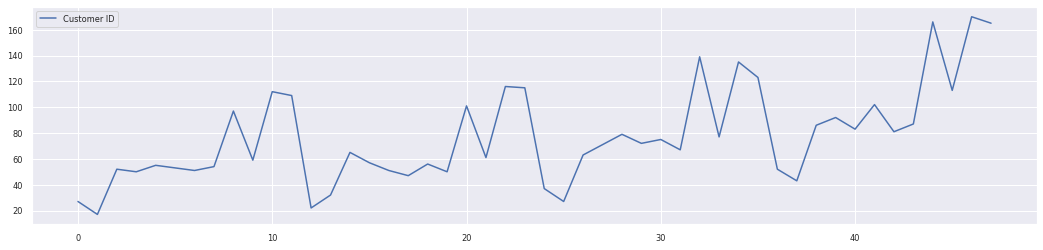

In [220]:
dataset["month_year"] = dataset['Order Date'].dt.to_period('M')
dataset.groupby(["month_year"],as_index=False).agg({'Customer ID':lambda x: x.nunique()}).plot(figsize=(18,4))

In [221]:
dataset_customer = dataset.groupby(["Order Date"],as_index=False).agg({'Customer ID':lambda x: x.nunique()})
dataset_customer = dataset_customer[(dataset_customer["Order Date"]>="2016-01-01 00:00:00")]
dataset_customer.shape

(617, 2)

In [222]:
# data forecasting
cust_forecast = dataset_customer.set_index("Order Date")
cust_forecast.columns = ["Total Customer"]
cust_forecast.index = pd.PeriodIndex(cust_forecast.index, freq = 'D')
cust_forecast.head()

,Total Customer
Order Date,
2016-01-02,1
2016-01-03,1
2016-01-04,2
2016-01-05,1
2016-01-07,1


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Total Customer'>)

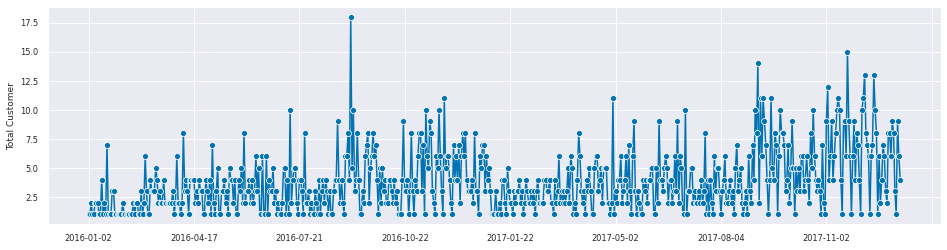

In [223]:
plot_series(cust_forecast["Total Customer"])

<AxesSubplot:>

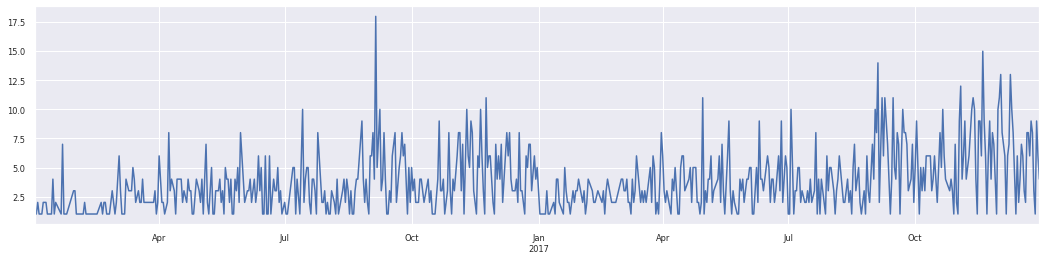

In [224]:
cust_forecast["Total Customer"].plot(figsize=(18,4))

In [225]:
#membuat function
def test_stationarity(ts,window=10,**kwargs):
    #membuat dataframe untuk plotingan
    plot_df = pd.DataFrame(ts)
    plot_df["rolling_mean"] = ts.rolling(window).mean()
    plot_df['rolling_std'] = ts.rolling(window).std()
    #hitung test augmented dicky-fuller
    p_val = adfuller(ts)[1]
    ax = plot_df.plot(**kwargs)
    ax.set_title(f"Dicky-Fuller p-value :{p_val:.3f}")

Total Customer    None
dtype: object

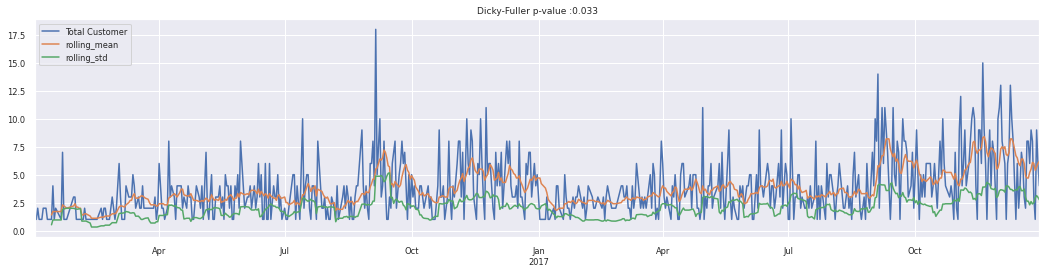

In [226]:
cust_forecast.apply(test_stationarity,figsize=(18, 4))

In [227]:
# Do train-test split
y_train, y_test = temporal_train_test_split(cust_forecast["Total Customer"], test_size=29)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Total Customer'>)

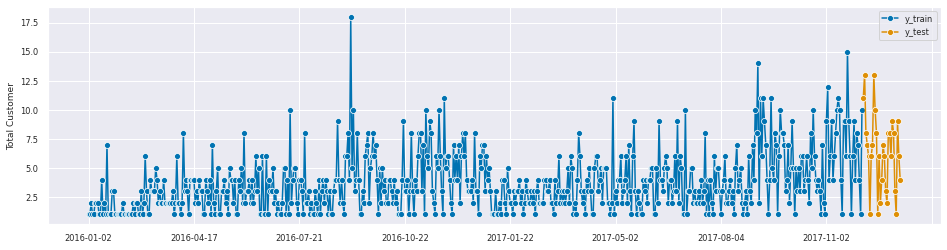

In [228]:
# check the time series after splitting
plot_series(y_train, y_test, labels=["y_train", "y_test"])

In [229]:
# specific data points
fh = ForecastingHorizon(y_test.index, is_relative=False)

In [230]:
# Exponential Smoothing
# define ets forecaster model
ets_forecaster = ExponentialSmoothing(trend=None, seasonal='multiplicative', sp=250)

In [231]:
# fit forecaster to train data
ets_forecaster.fit(y_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


ExponentialSmoothing(seasonal='multiplicative', sp=250)

In [232]:
# do prediction based on forecast horizon we already defined
y_pred_ets = ets_forecaster.predict(fh=fh)

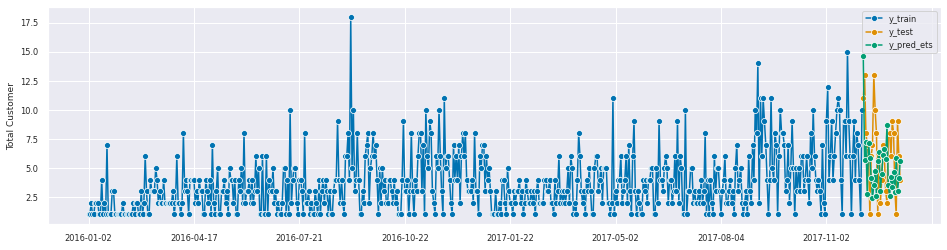

In [233]:
# plot the forecast result
plot_series(y_train, y_test, y_pred_ets, labels=["y_train", "y_test", "y_pred_ets"]);

In [234]:
mean_absolute_percentage_error(y_test, y_pred_ets) * 100

97.09652995015767

In [235]:
# AutoETS
# define auto ets forecaster model
auto_ets_forecaster = AutoETS(auto=True, sp=250)

In [236]:
# fit forecaster to train data
auto_ets_forecaster.fit(y_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: 

AutoETS(auto=True, sp=250)

In [213]:
# do prediction based on forecast horizon we already defined
y_pred_auto_ets = auto_ets_forecaster.predict(fh=fh)

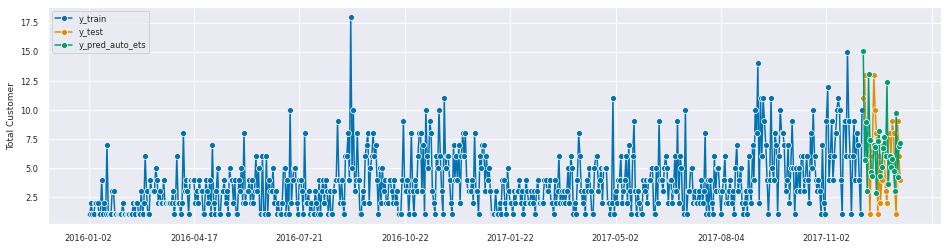

In [214]:
# plot the forecast result
plot_series(y_train, y_test, y_pred_auto_ets, labels=["y_train", "y_test", "y_pred_auto_ets"]);

In [215]:
mean_absolute_percentage_error(y_test, y_pred_auto_ets) * 100

130.31968900942155

### Forecasting the Number of Transaction

<AxesSubplot:>

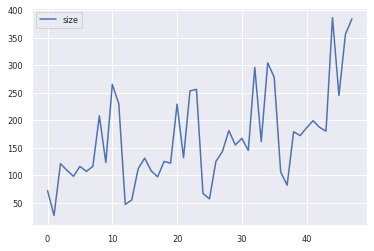

In [216]:
dataset.groupby(["month_year"],as_index=False)["Order ID"].size().plot()

In [217]:
dataset_total_trx = dataset.groupby(["Order Date"],as_index=False)['Order ID'].size()
dataset_total_trx = dataset_total_trx[(dataset_total_trx["Order Date"]>="2016-01-01 00:00:00")]
dataset_total_trx.shape

(617, 2)

In [237]:
# data forecasting
trx_forecast = dataset_total_trx.set_index("Order Date")
trx_forecast.columns = ["total transaction"]
trx_forecast.index = pd.PeriodIndex(trx_forecast.index, freq = 'D')
trx_forecast.head()

,total transaction
Order Date,
2016-01-02,2
2016-01-03,1
2016-01-04,3
2016-01-05,3
2016-01-07,1


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='total transaction'>)

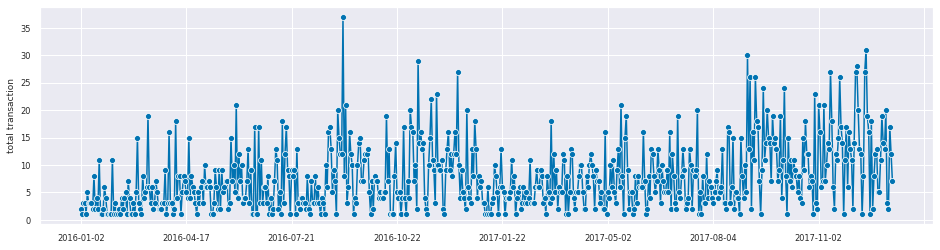

In [238]:
plot_series(trx_forecast["total transaction"])

total transaction    None
dtype: object

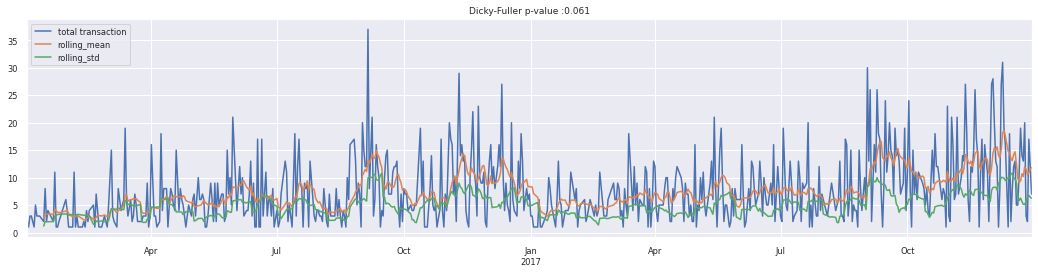

In [241]:
trx_forecast.apply(test_stationarity,figsize=(18,4))

In [240]:
# Do train-test split
y_train, y_test = temporal_train_test_split(trx_forecast["total transaction"], test_size=29)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='total transaction'>)

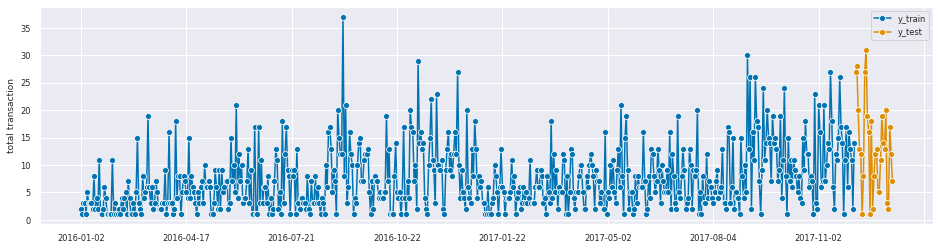

In [242]:
# check the time series after splitting
plot_series(y_train, y_test, labels=["y_train", "y_test"])

In [243]:
# specific data points
fh = ForecastingHorizon(y_test.index, is_relative=False)

In [244]:
#Exponential Smoothing
# define ets forecaster model
ets_forecaster = ExponentialSmoothing(trend=None, seasonal='multiplicative', sp=250)

In [245]:
# fit forecaster to train data
ets_forecaster.fit(y_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


ExponentialSmoothing(seasonal='multiplicative', sp=250)

In [246]:
# do prediction based on forecast horizon we already defined
y_pred_ets = ets_forecaster.predict(fh=fh)

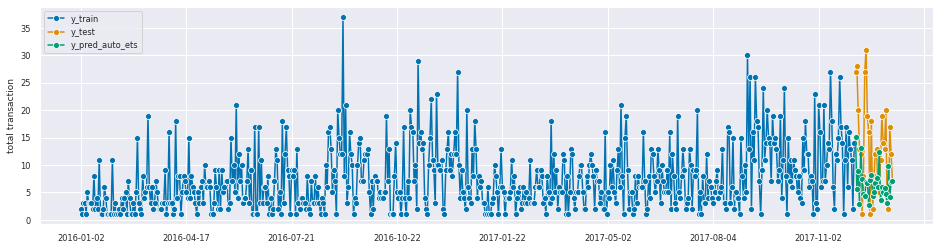

In [247]:
# plot the forecast result
plot_series(y_train, y_test, y_pred_auto_ets, labels=["y_train", "y_test", "y_pred_auto_ets"]);

In [248]:
mean_absolute_percentage_error(y_test, y_pred_ets) * 100

201.4783482770654

In [249]:
#AutoETS
# define auto ets forecaster model
auto_ets_forecaster = AutoETS(auto=True, sp=250)

In [250]:
# fit forecaster to train data
auto_ets_forecaster.fit(y_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: 

AutoETS(auto=True, sp=250)

In [251]:
# do prediction based on forecast horizon we already defined
y_pred_auto_ets = auto_ets_forecaster.predict(fh=fh)

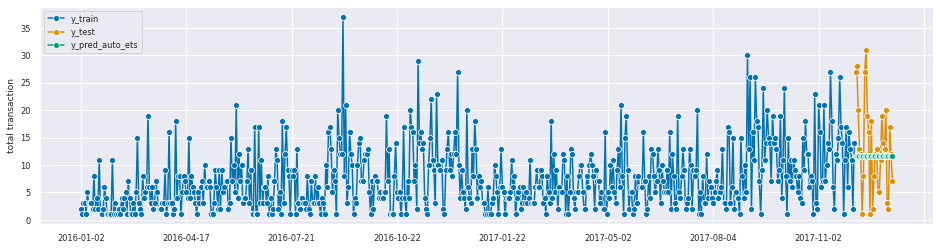

In [252]:
# plot the forecast result
plot_series(y_train, y_test, y_pred_auto_ets, labels=["y_train", "y_test", "y_pred_auto_ets"]);

In [253]:
mean_absolute_percentage_error(y_test, y_pred_auto_ets) * 100

149.51856443379285

1. Based on the results of data analysis on the transaction pattern, it shows that at the beginning of the month a fairly good value was obtained for all parameters (number of customers, number of transactions, total GMV and total profit), this shows that there is a fairly large transaction potential even though we do not provide discount or special campaign, the most important thing to do is make sure there is sufficient stock at the beginning of each month

2. The same thing happened to the monthly achievement where the last 4 months showed a fairly good value for all parameters (number of customers, number of transactions, total GMV and total profit), this also shows that there is a fairly large transaction potential even though we do not provide discount or special campaign, the most important thing to do is make sure there is sufficient stock at the beginning of each month

3. There was a significant decrease in the average value in 10 months, this needs to be investigated whether there has ever been a certain condition that caused it to happen such as system damage or errors in the data obtained

4. In the middle of the week shows the average value that is not good for all parameters so it is necessary to do special strategies such as discounts or campaigns that can increase all these parameters